# Решающие деревья

<img src='tree_example.png'>

*Source: https://www.upnxtblog.com/index.php/2017/12/06/17-machine-learning-algorithms-that-you-should-know/*

Сами по себе решающие деревья используются в машинном обучении относительно редко, однако очень распространены методы, основанные на их композиции — ансамблях (Random Forest, XGBoost, LightGBM).

## Линейные модели или решающие деревья?

- Когда данные хорошо линейно разделимы, линейная модель лучше.

- Когда данные плохо линейно разделимы (много сложных нелинейных зависимостей в данных), модель, основанная на решающих деревьях, лучше.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
plt.rcParams['figure.figsize'] = (11, 6.5)

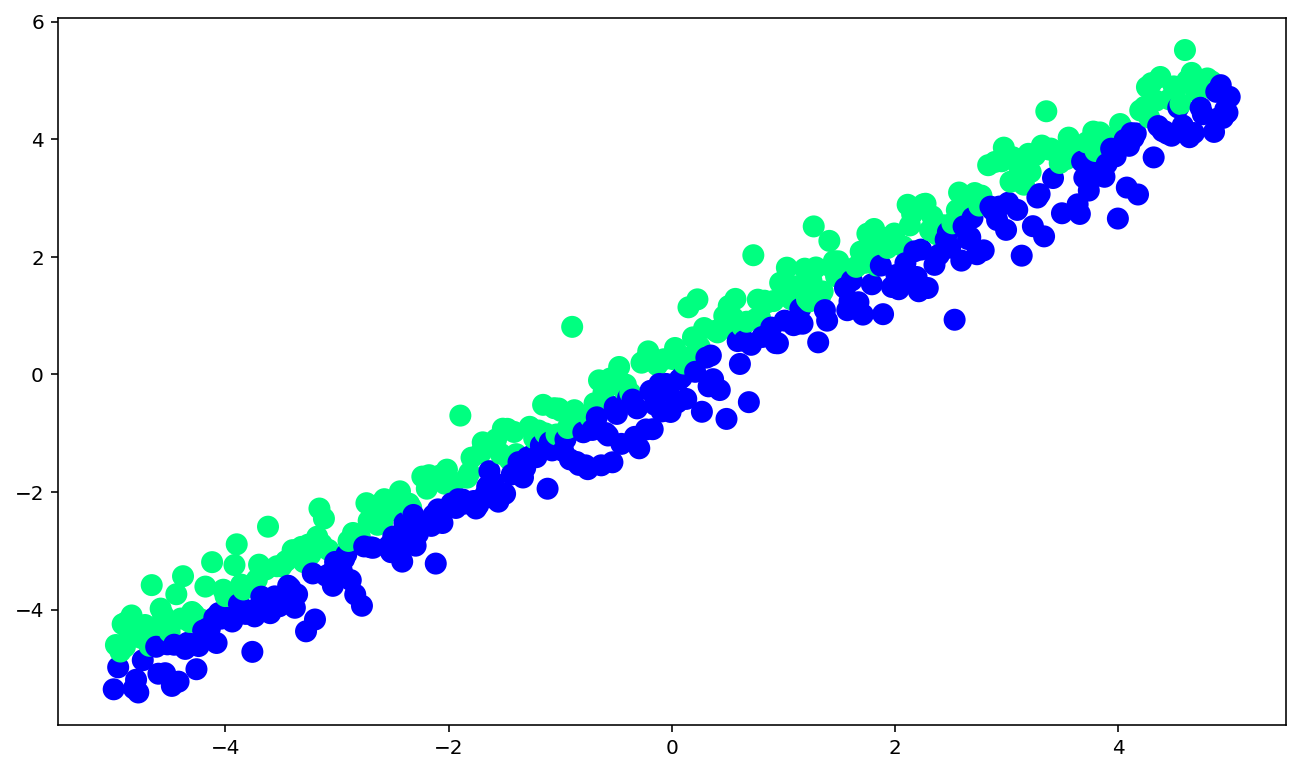

In [3]:
np.random.seed(13)
n = 500
X = np.zeros(shape=(n, 2))
X[:, 0] = np.linspace(-5, 5, 500)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=n)
y = (X[:, 1] > X[:, 0]).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap='winter')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=13)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_lr, y_test)

0.992

/opt/anaconda3/envs/r_env/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


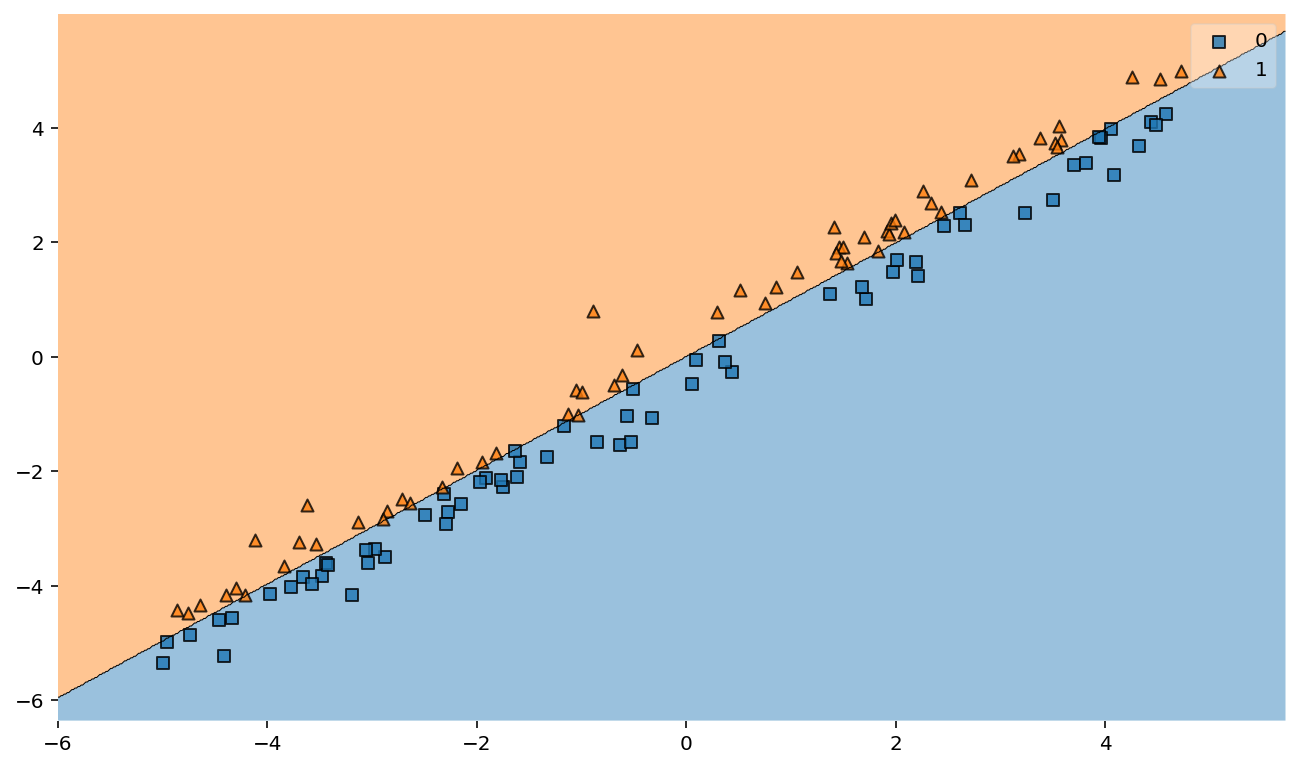

In [7]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_test, lr)

plt.show()

In [8]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=13)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [9]:
accuracy_score(y_pred_dt, y_test)

0.864

/opt/anaconda3/envs/r_env/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


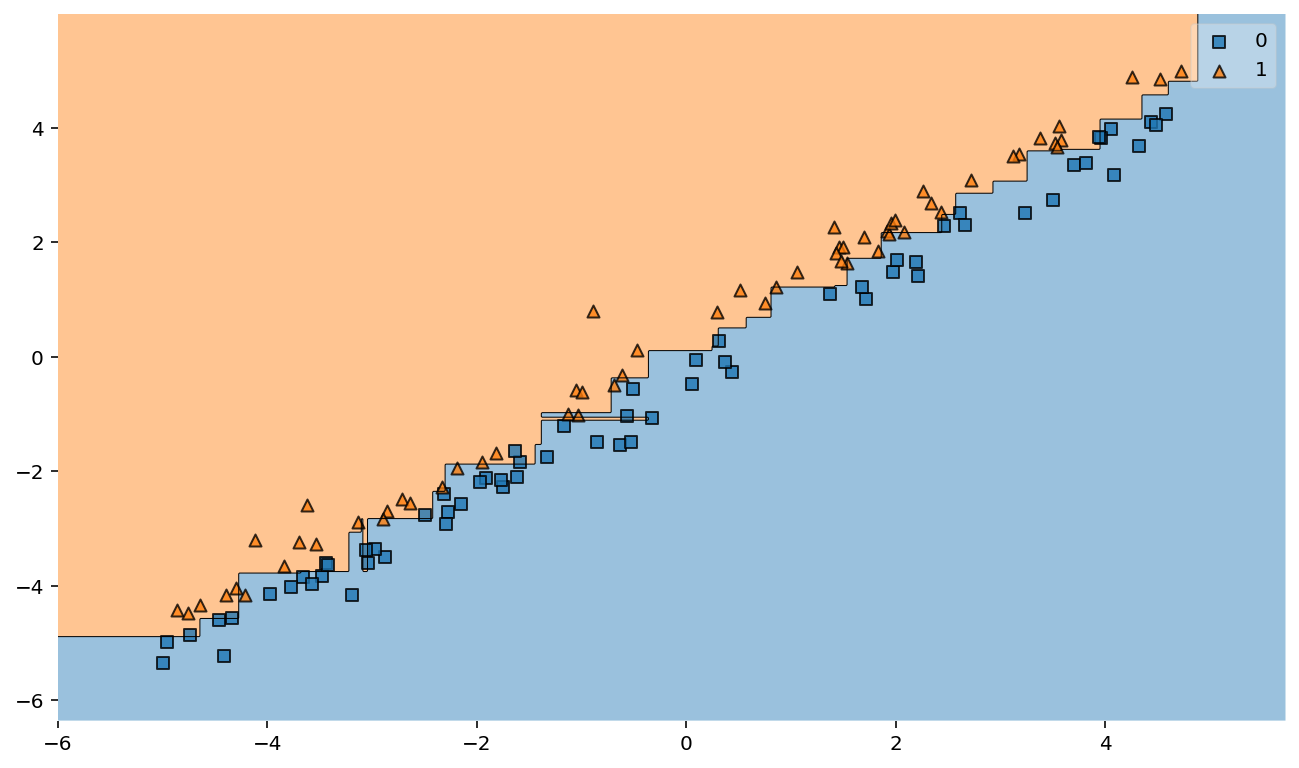

In [10]:
plot_decision_regions(X_test, y_test, dt)
plt.show()

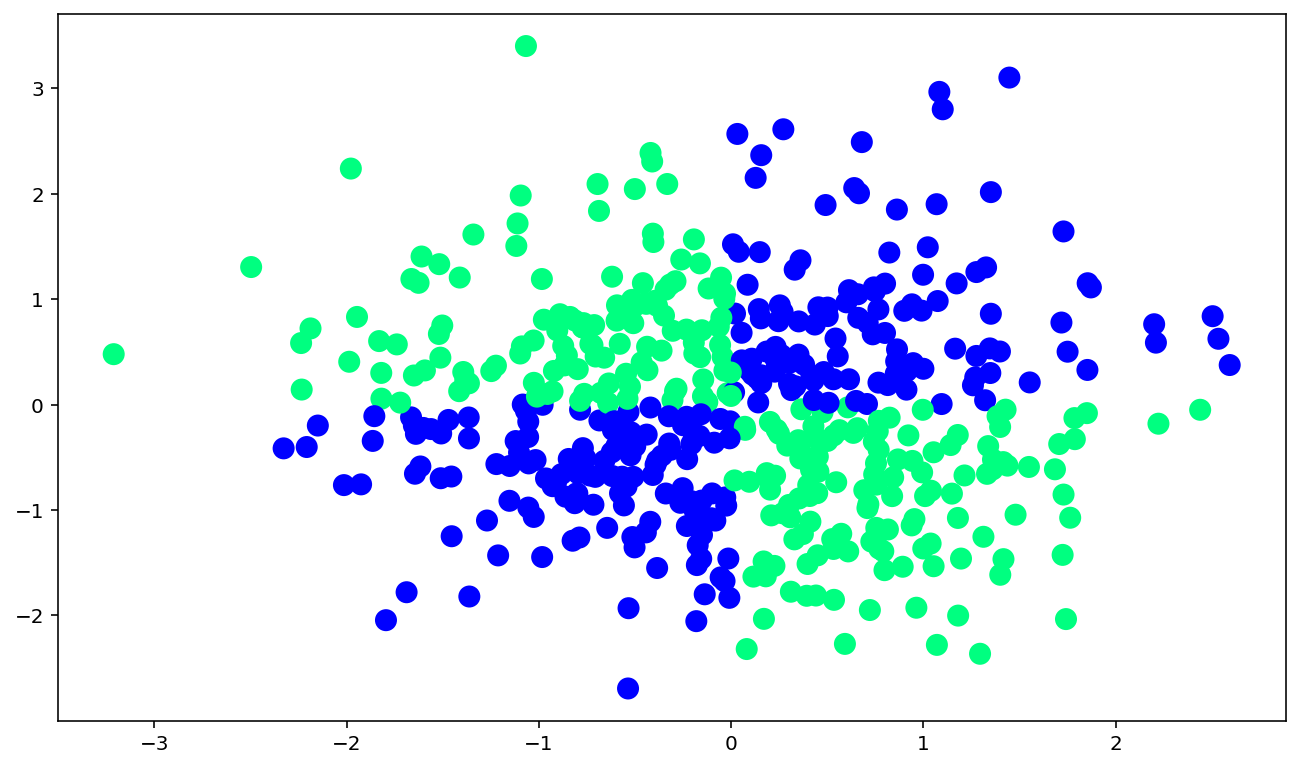

In [11]:
np.random.seed(13)
X = np.random.randn(500, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap='winter')
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [13]:
lr = LogisticRegression(random_state=13)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_score(y_pred_lr, y_test)

0.392

/opt/anaconda3/envs/r_env/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


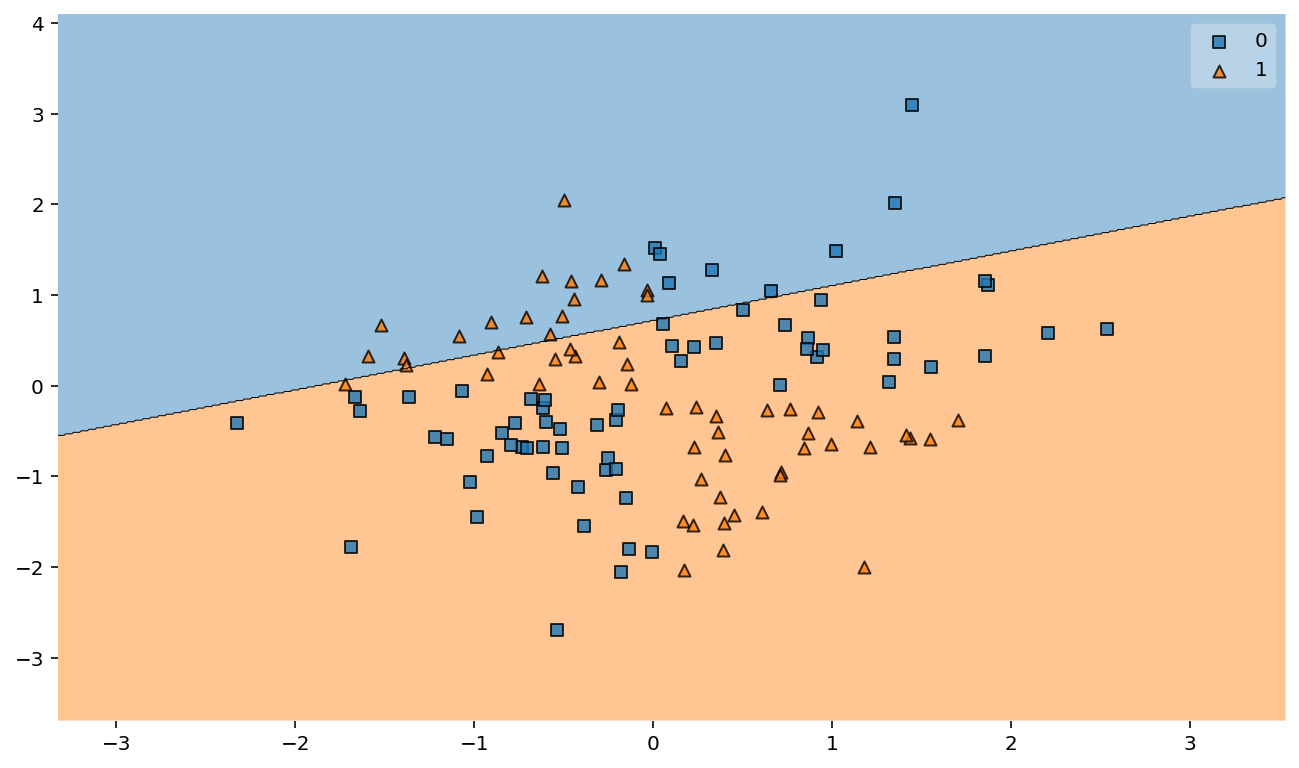

In [14]:
plot_decision_regions(X_test, y_test, lr)
plt.show()

In [15]:
dt = DecisionTreeClassifier(random_state=13)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_score(y_pred_dt, y_test)

0.968

/opt/anaconda3/envs/r_env/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


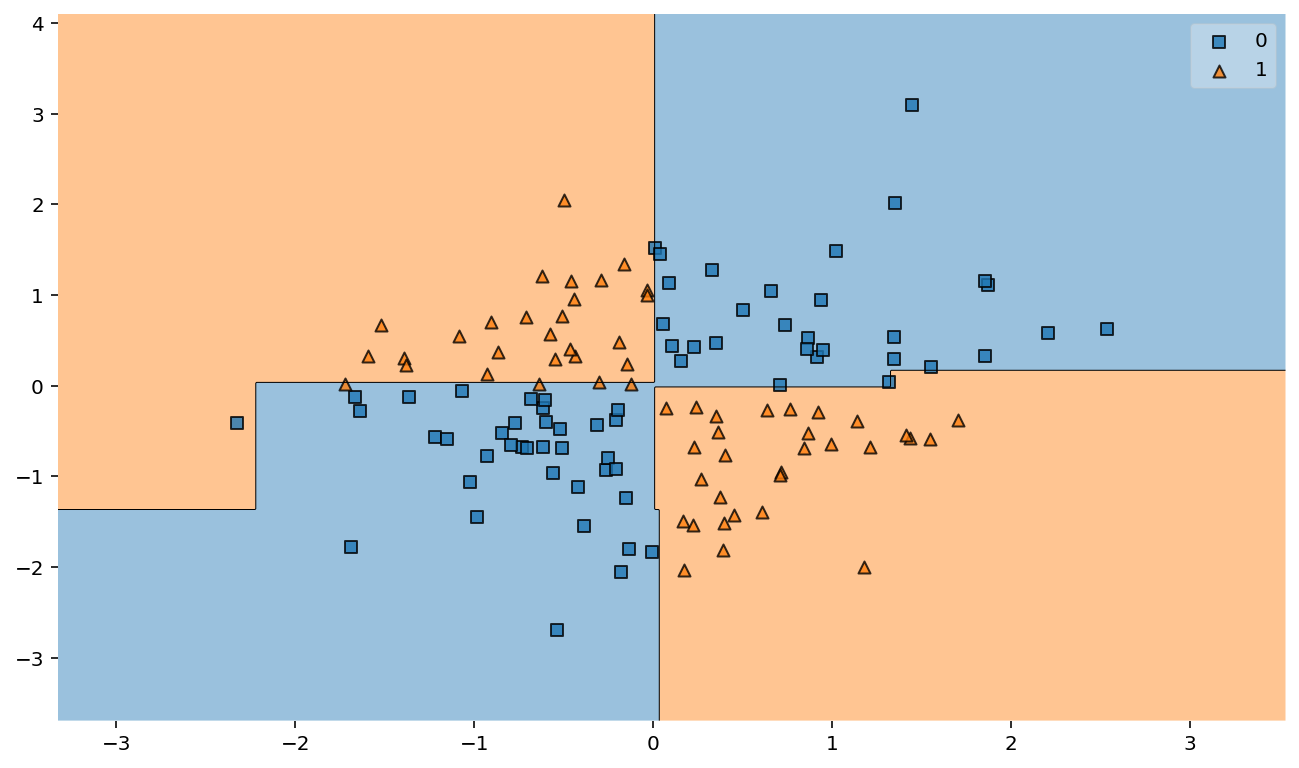

In [16]:
plot_decision_regions(X_test, y_test, dt)
plt.show()

## Переобучение

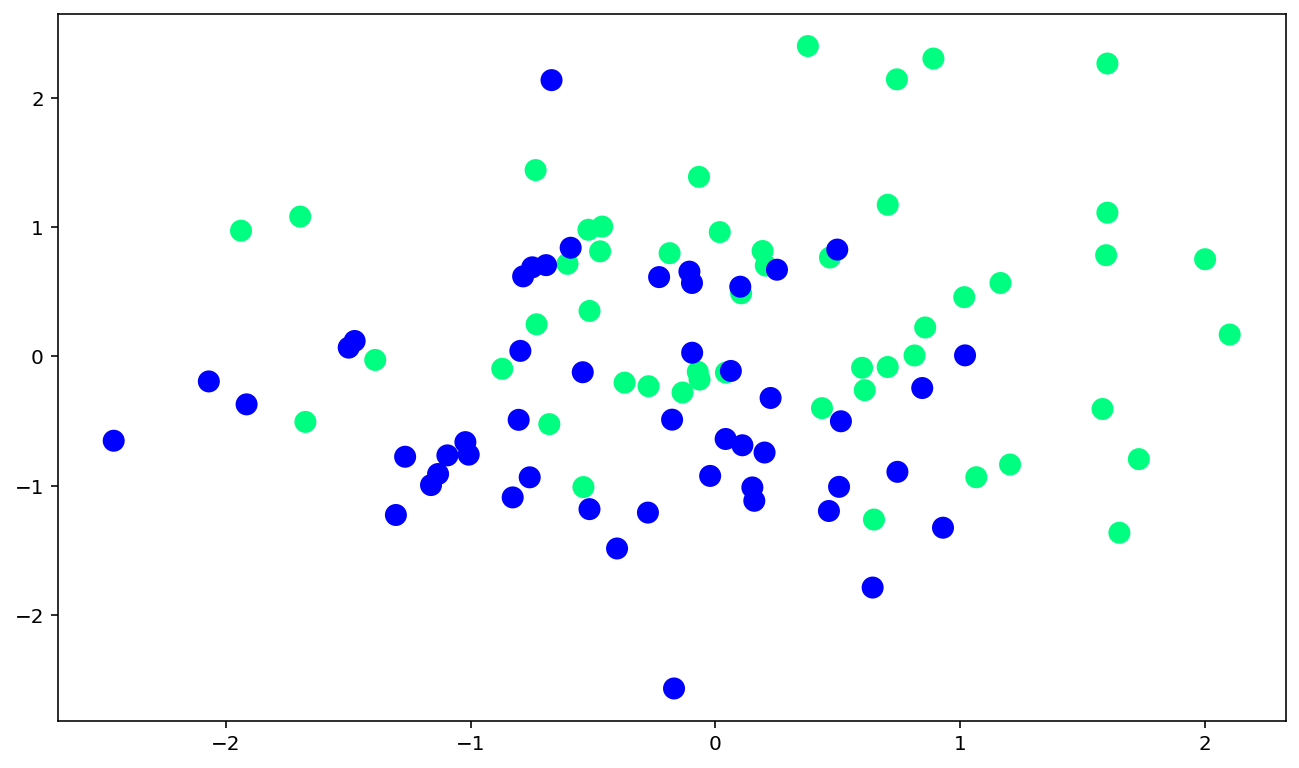

In [17]:
np.random.seed(13)
n = 100
X = np.random.normal(size=(n, 2))
X[:50, :] += 0.25
X[50:, :] -= 0.25
y = np.array([1] * 50 + [0] * 50)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap='winter')
plt.show()

Как влияют разные значения гиперпараметров решающего дерева на его структуру?

- `max_depth`: максимальная глубина дерева.
- `min_samples_leaf`: минимальное число объектов в вершине дерева, необходимое для того, чтобы она стала листовой.

/opt/anaconda3/envs/r_env/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/opt/anaconda3/envs/r_env/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/opt/anaconda3/envs/r_env/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/opt/anaconda3/envs/r_env/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to ax

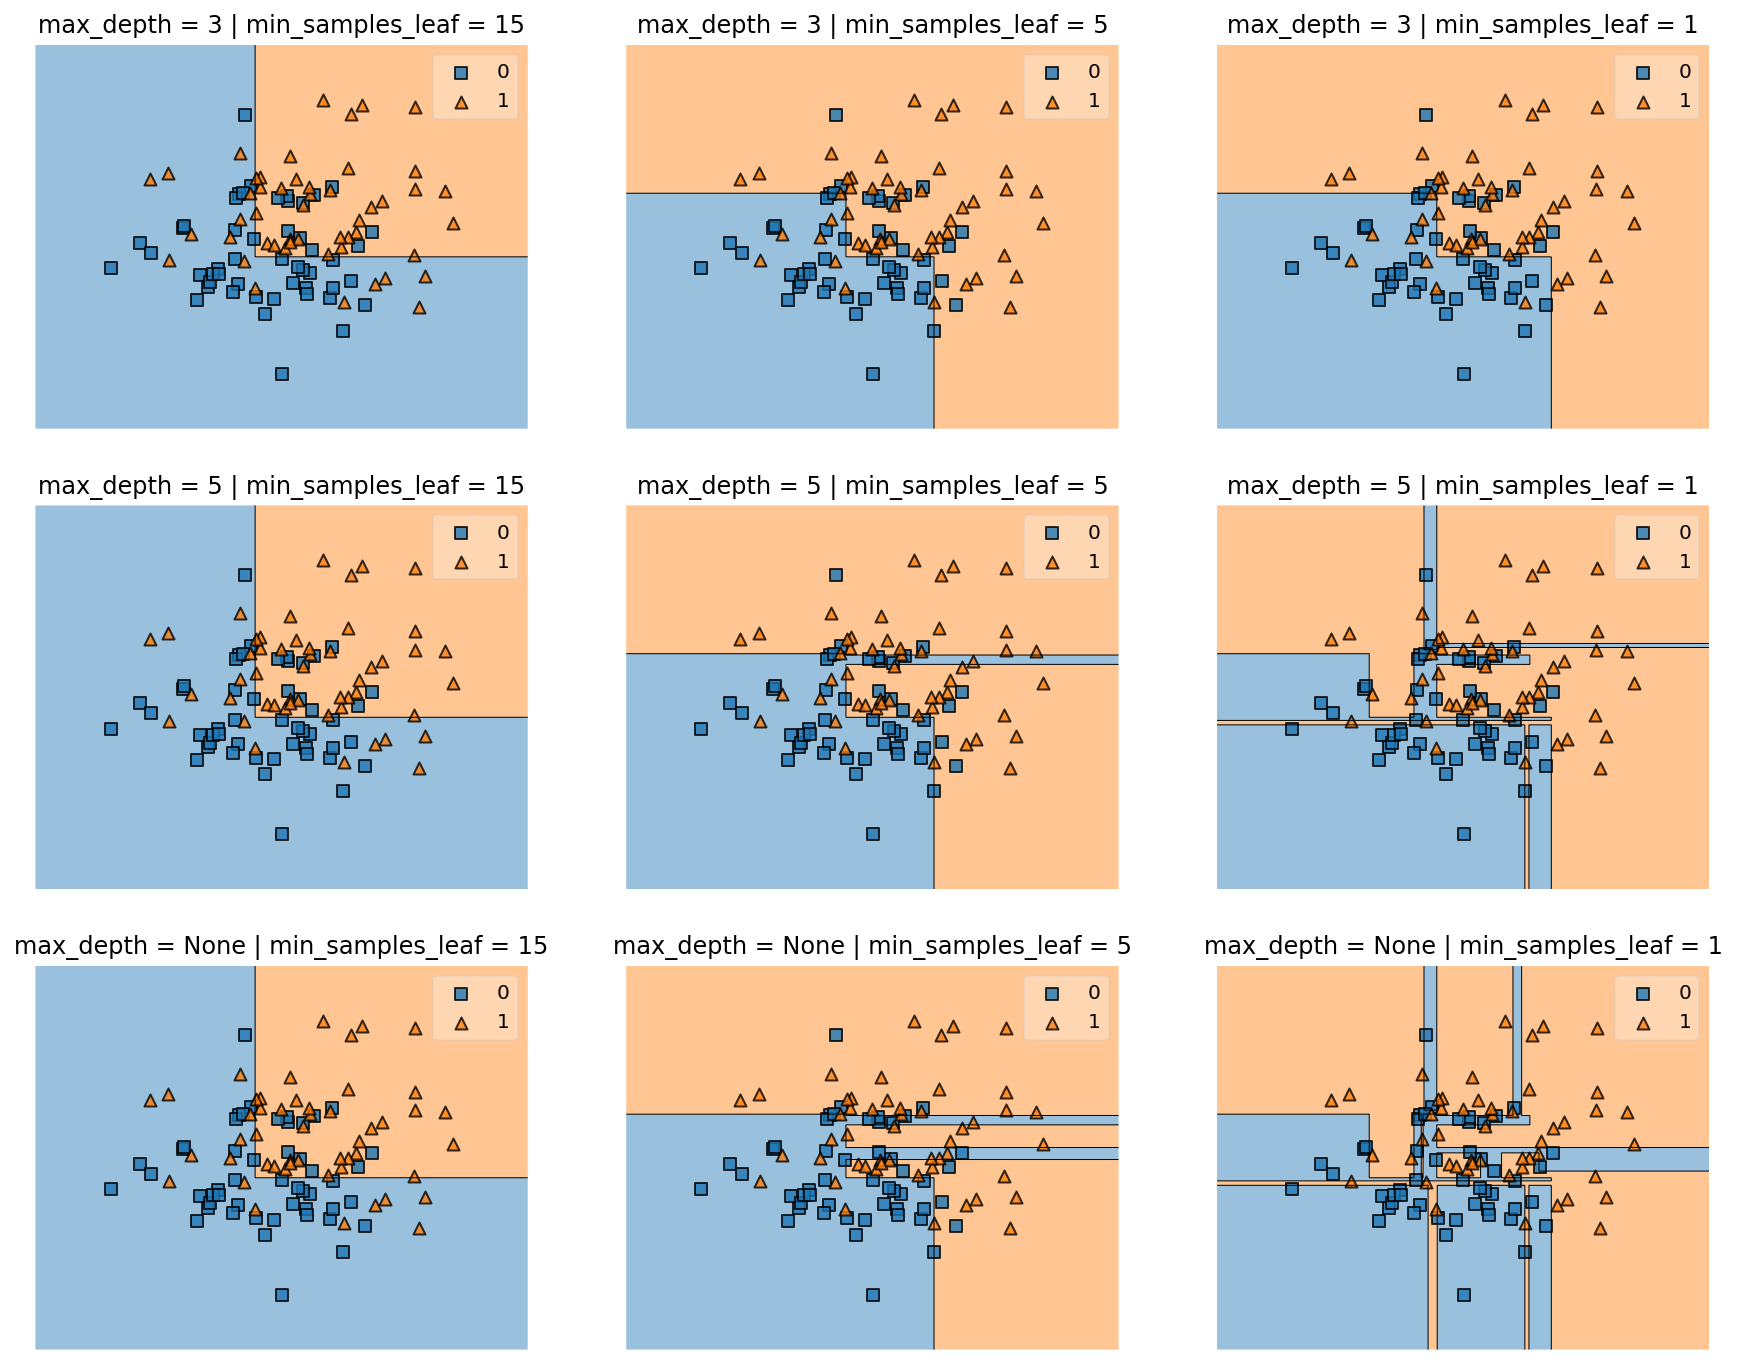

In [18]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, max_depth in enumerate([3, 5, None]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=13)
        dt.fit(X, y)
        ax[i][j].set_title('max_depth = {} | min_samples_leaf = {}'.format(max_depth, min_samples_leaf))
        ax[i][j].axis('off')
        plot_decision_regions(X, y, dt, ax=ax[i][j])
        
plt.show()

На любой выборке (исключая те, где есть объекты с одинаковыми значениями признаков, но разными ответами) можно получить нулевую ошибку с помощью максимально переобученного дерева:

/opt/anaconda3/envs/r_env/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


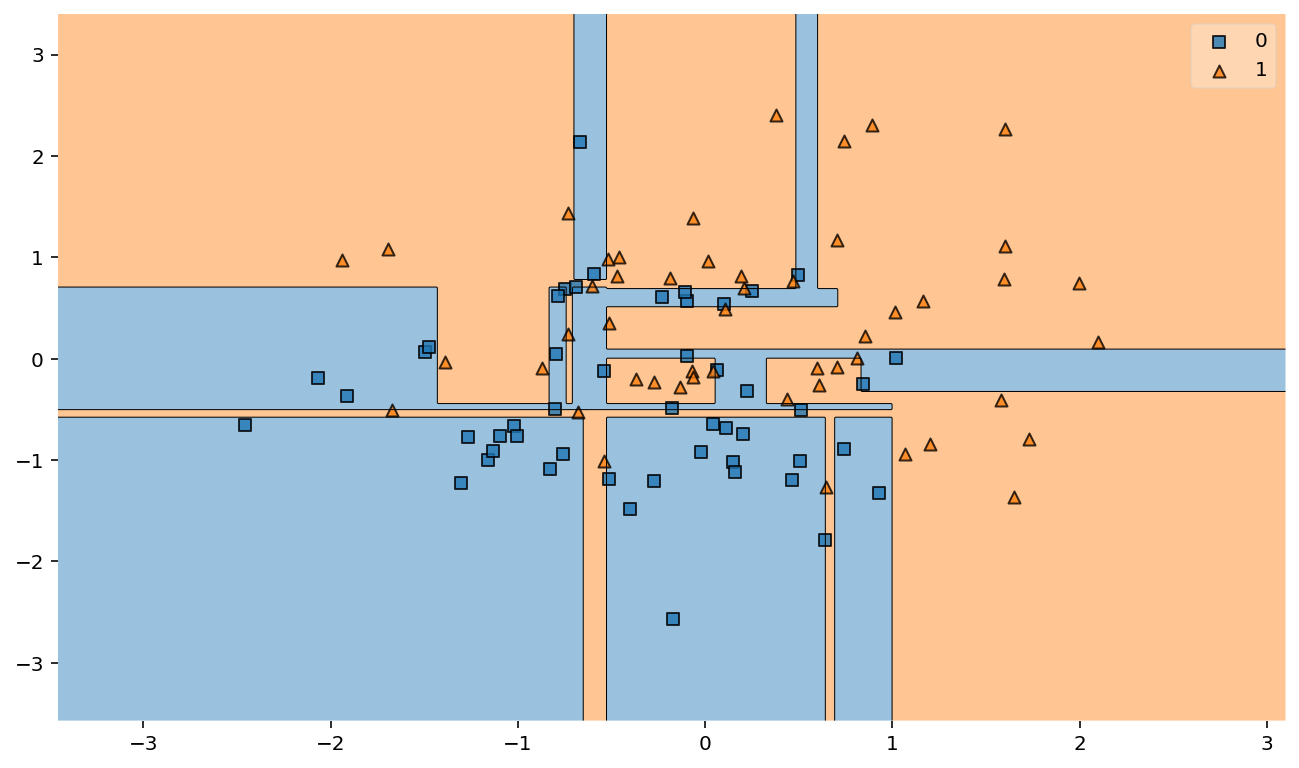

In [19]:
dt = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, random_state=13)
dt.fit(X, y)
plot_decision_regions(X, y, dt)
plt.show()

In [20]:
accuracy_score(y, dt.predict(X))

1.0

## Неустойчивость

Посмотрим, как будет меняться структура дерева, если брать для обучения разные 90%-ые подвыборки исходной выборки.

/opt/anaconda3/envs/r_env/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/opt/anaconda3/envs/r_env/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/opt/anaconda3/envs/r_env/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/opt/anaconda3/envs/r_env/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to ax

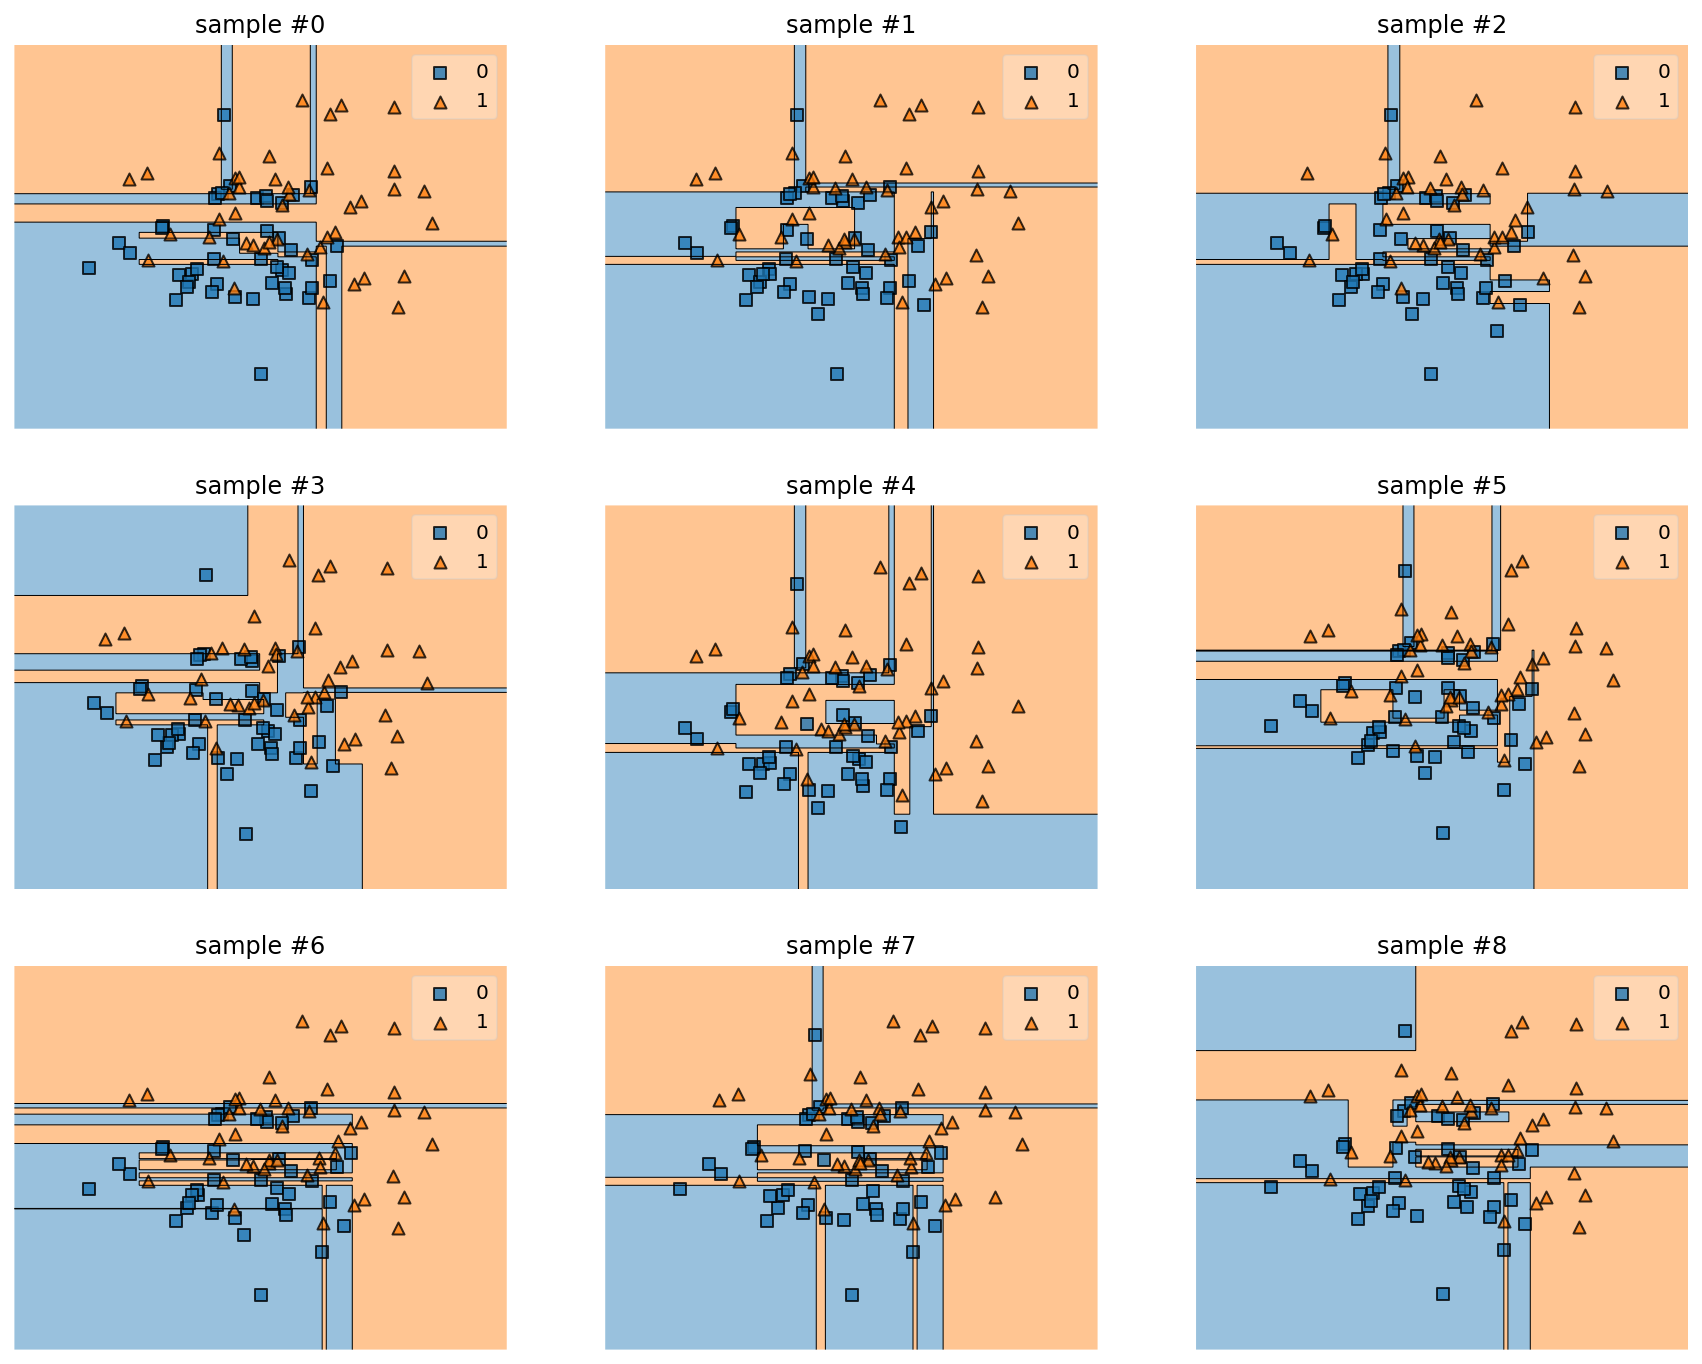

In [21]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i in range(3):
    for j in range(3):
        seed_idx = 3 * i + j
        np.random.seed(seed_idx)
        dt = DecisionTreeClassifier(random_state=13)
        idx_part = np.random.choice(len(X), replace=False, size=int(0.9 * len(X)))
        X_part, y_part = X[idx_part, :], y[idx_part]
        dt.fit(X_part, y_part)
        ax[i][j].set_title('sample #{}'.format(seed_idx))
        ax[i][j].axis('off')
        plot_decision_regions(X_part, y_part, dt, ax=ax[i][j])
plt.show()

## Практика

In [22]:
import pandas as pd
from sklearn.datasets import load_boston

In [23]:
boston = load_boston()

In [24]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [25]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [26]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [27]:
X = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [28]:
X.shape

(506, 13)

In [29]:
y = boston['target']
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [30]:
y.shape

(506,)

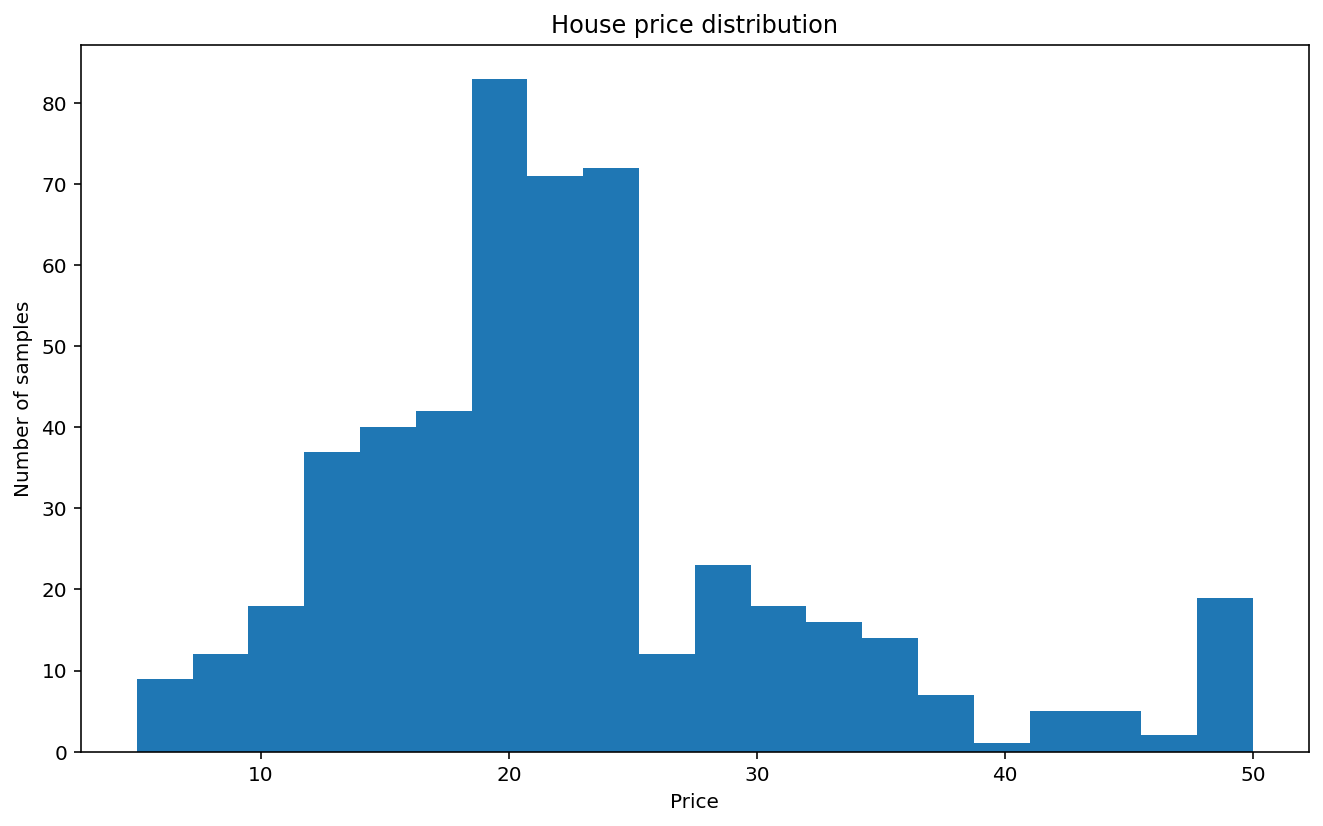

In [31]:
plt.title('House price distribution')
plt.xlabel('Price')
plt.ylabel('Number of samples')
plt.hist(y, bins=20)
plt.show()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

## Решающее дерево своими руками

$R_m$ — множество объектов в разбиваемой вершине, $j$ — номер признака, по которому происходит разбиение, $t$ — порог разбиения.

Критерий ошибки:

$$
Q(R_m, j, t) = \frac{|R_\ell|}{|R_m|}H(R_\ell) + \frac{|R_r|}{|R_m|}H(R_r) \to \min_{j, t}
$$

$R_\ell$ — множество объектов в левом поддереве, $R_r$ — множество объектов в правом поддереве.

$H(R)$ — критерий информативности, с помощью которого можно оценить качество распределения целевой переменной среди объектов множества $R$.

_Реализуйте подсчет критерия ошибки. Для этого реализуйте функции для подсчета значения критерия информативности, а также для разбиения вершины._

In [33]:
X_train.index

Int64Index([ 61,  97,  13, 207, 110, 456, 405, 464, 481,  37,
            ...
            442, 236, 153, 244, 354, 230,  16,  74, 176, 338],
           dtype='int64', length=379)

In [34]:
y[X_train.index]

array([16. , 38.7, 20.4, 22.5, 21.7, 12.7,  5. , 21.4, 23.7, 21. , 19.5,
       20.1, 24.6, 36.1, 23. , 18.5, 32.5, 19.1, 23.3, 18.5, 21.5, 19.3,
       26.4, 31. , 22.3, 13.3,  7. , 22.5, 27.5, 30.1, 10.2, 20. , 25. ,
       17.8, 13.8, 32. , 23.7, 23.8, 16.7, 23.8, 18.8, 22. , 29. , 21.2,
       33.1, 30.7, 24.8, 21.7, 37.6, 23.1, 22.9, 13.6, 14.6, 18.9, 22.6,
       31.7, 19.4, 12.7, 20.1, 30.3, 18.8,  8.1, 20.6, 33.2, 21.1, 31.5,
       20. ,  8.5, 22.2, 24.8, 50. , 21.7, 24. , 15. , 13.5,  9.7, 18.9,
       22.6, 29.6, 20.6, 24.3, 16.2, 19.6, 35.1, 17.5, 12.5, 22.2, 22.9,
       34.9, 28. , 17.4,  7.2, 23.4, 21.2, 27.9, 20.2, 22.7, 26.2, 50. ,
       32. , 20.7, 15. , 17.2, 23.1, 10.9, 21.5, 17.2, 35.2, 10.9, 23.8,
       17.8, 25. , 10.5, 26.6, 11.9, 20.3, 21.9, 14.5, 10.8, 23.1, 25. ,
       14.9,  6.3, 24.2, 13.2, 24.7, 19.8, 18.5, 23.9, 29.6, 18.7, 29.1,
       10.5, 32.2, 50. , 35.4,  7.5, 16.3, 25. , 25.3, 19.1, 28.7, 14.3,
       23.1, 19.8, 17.5, 20. ,  8.3, 23.2, 26.7, 17

In [35]:
def H(R):
    return y[R.index].var()

In [36]:
def split_node(R_m, feature, t):
    R_l = R_m[R_m[feature] <= t]
    R_r = R_m[R_m[feature] > t]
    
    return R_l, R_r

In [37]:
def q_error(R_m, feature, t):
    R_l, R_r = split_node(R_m, feature, t)
    Q = len(R_l) / len(R_m) * H(R_l) + len(R_r) / len(R_m) * H(R_r)
    return Q

_Переберите все возможные разбиения выборки по одному из признаков и постройте график критерия ошибки в зависимости от значения порога._

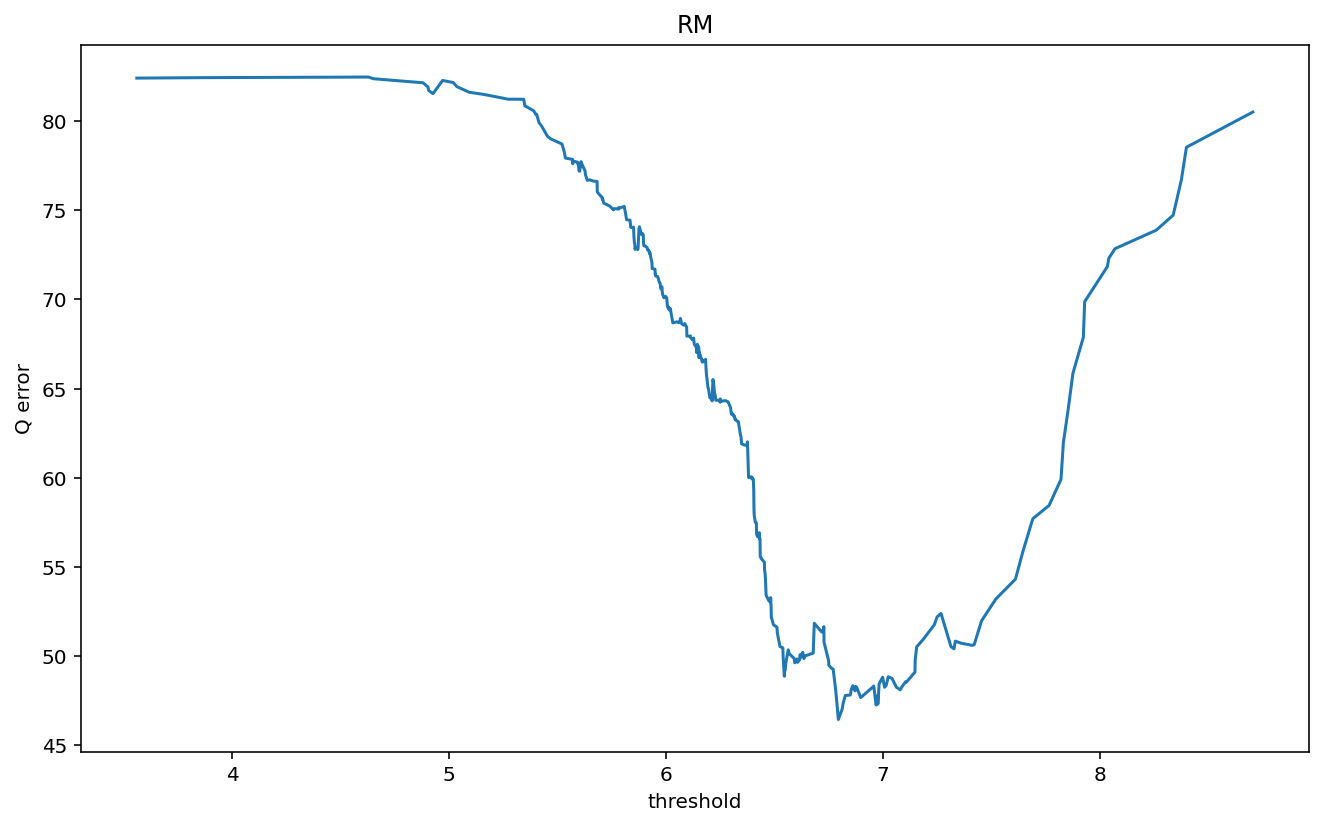

In [38]:
feature = 'RM'
Q_array = []
feature_values = np.unique(X_train[feature])[:-1]
for t in feature_values:
    Q_array.append(q_error(X_train, feature, t))
plt.plot(feature_values, Q_array)
plt.title(feature)
plt.xlabel('threshold')
plt.ylabel('Q error')
plt.show()

_Напишите функцию, находящую оптимальное разбиение данной вершины по данному признаку._

In [39]:
def get_optimal_split(R_m, feature):
    Q_array = []
    feature_values = np.unique(R_m[feature])[:-1]
    for t in feature_values:
        Q_array.append(q_error(R_m, feature, t))
    opt_threshold = feature_values[np.argmin(Q_array)]
    return opt_threshold, Q_array

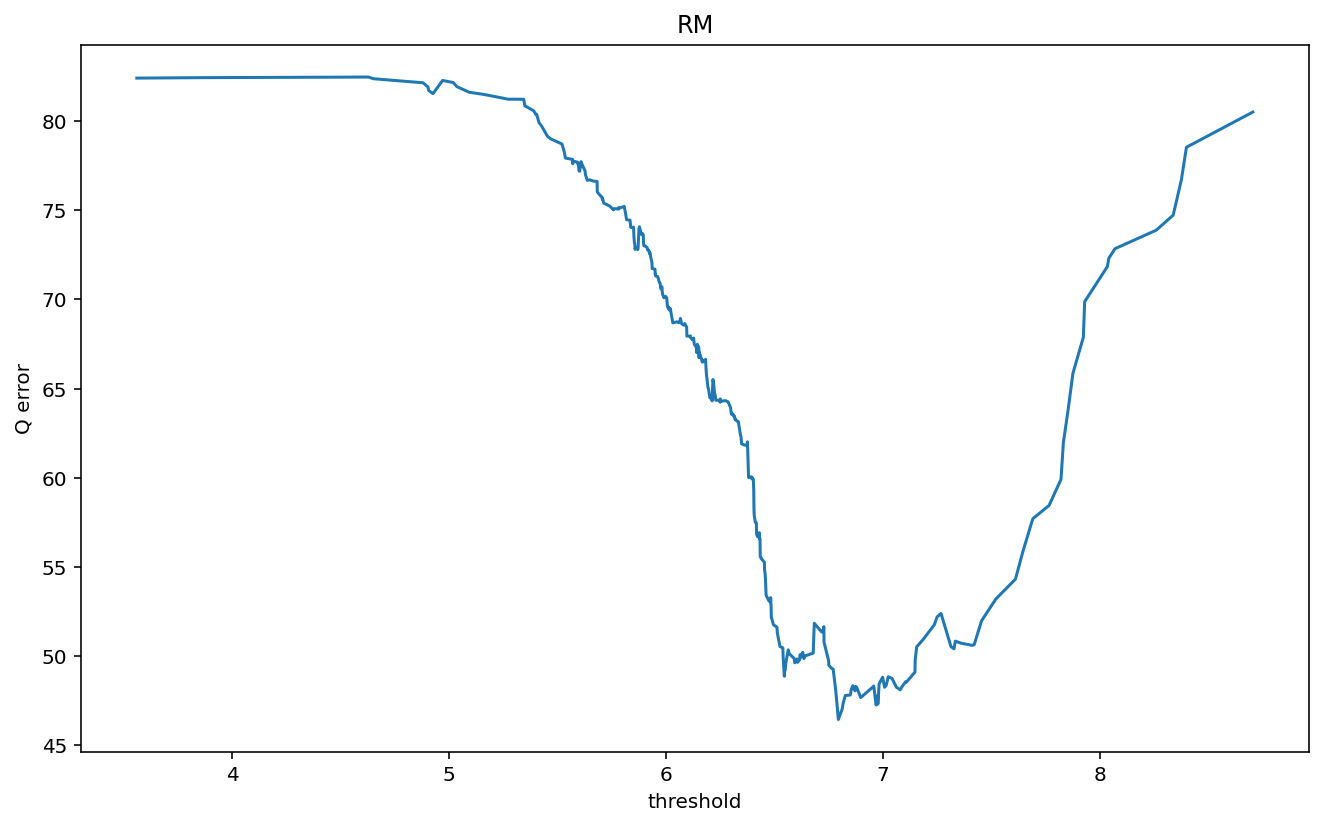

In [40]:
t, Q_array = get_optimal_split(X_train, feature)
plt.plot(np.unique(X_train[feature])[:-1], Q_array)
plt.title(feature)
plt.xlabel('threshold')
plt.ylabel('Q error')
plt.show()

In [41]:
t

6.794

_Постройте графики критерия ошибки (в зависимости от количества объектов в левом поддереве) для каждого из признаков. Найдите признак, показывающий наилучшее качество. Какой это признак? Каков порог разбиения и значение качества? Постройте график критерия ошибки для данного признака в зависимости от значения порога._

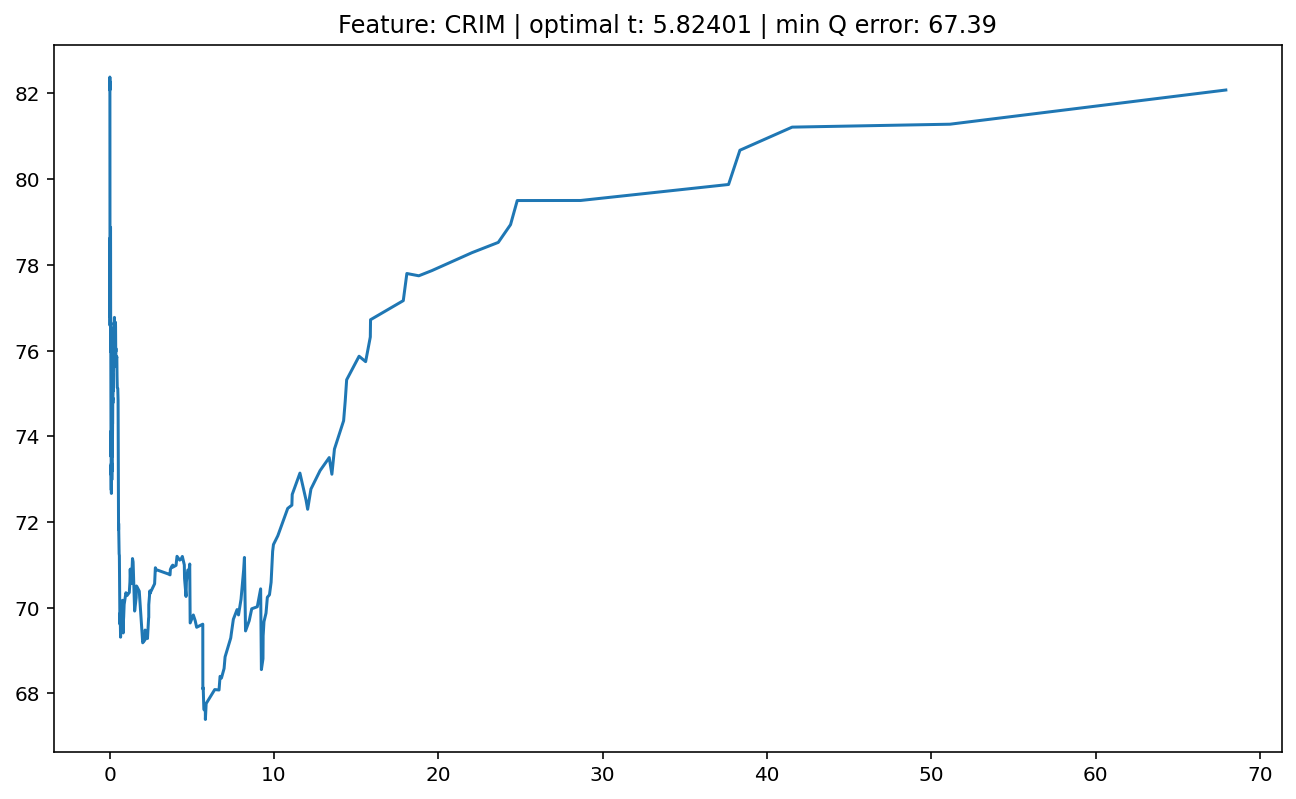

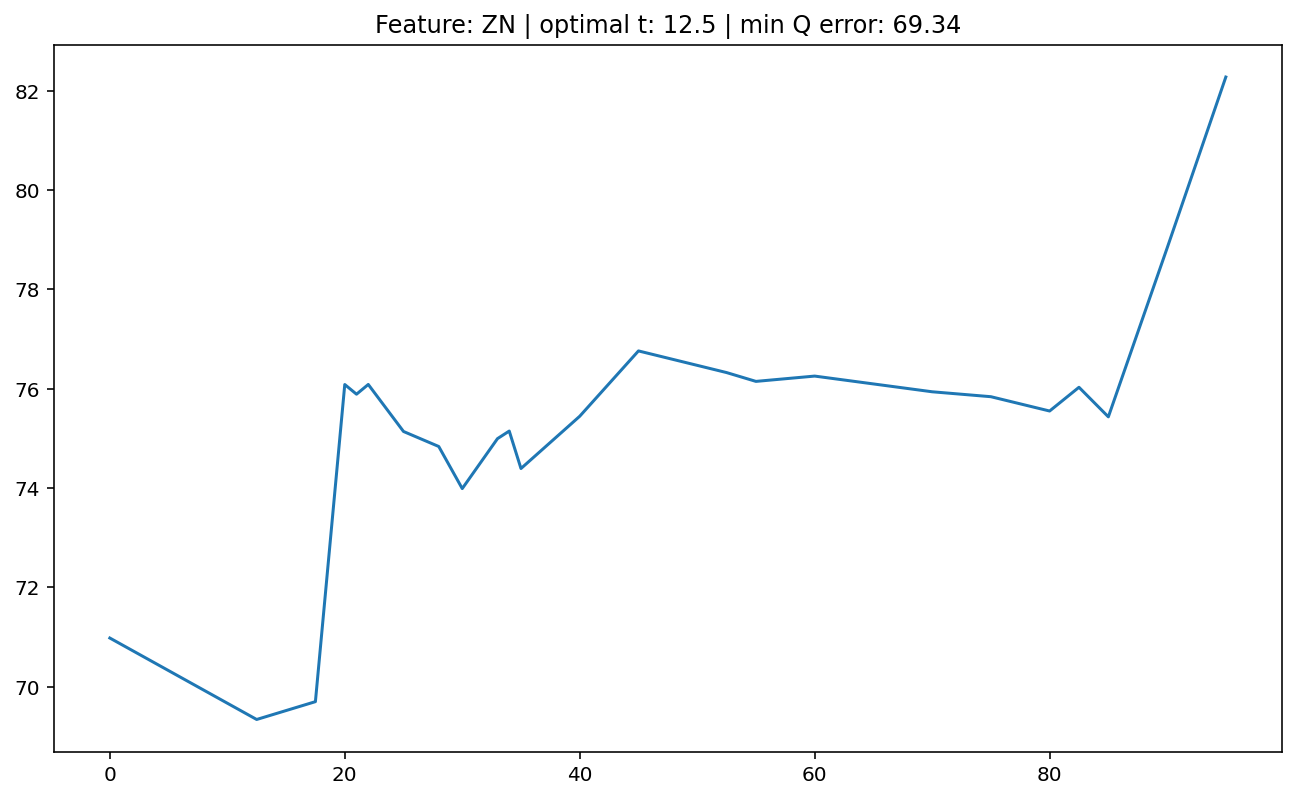

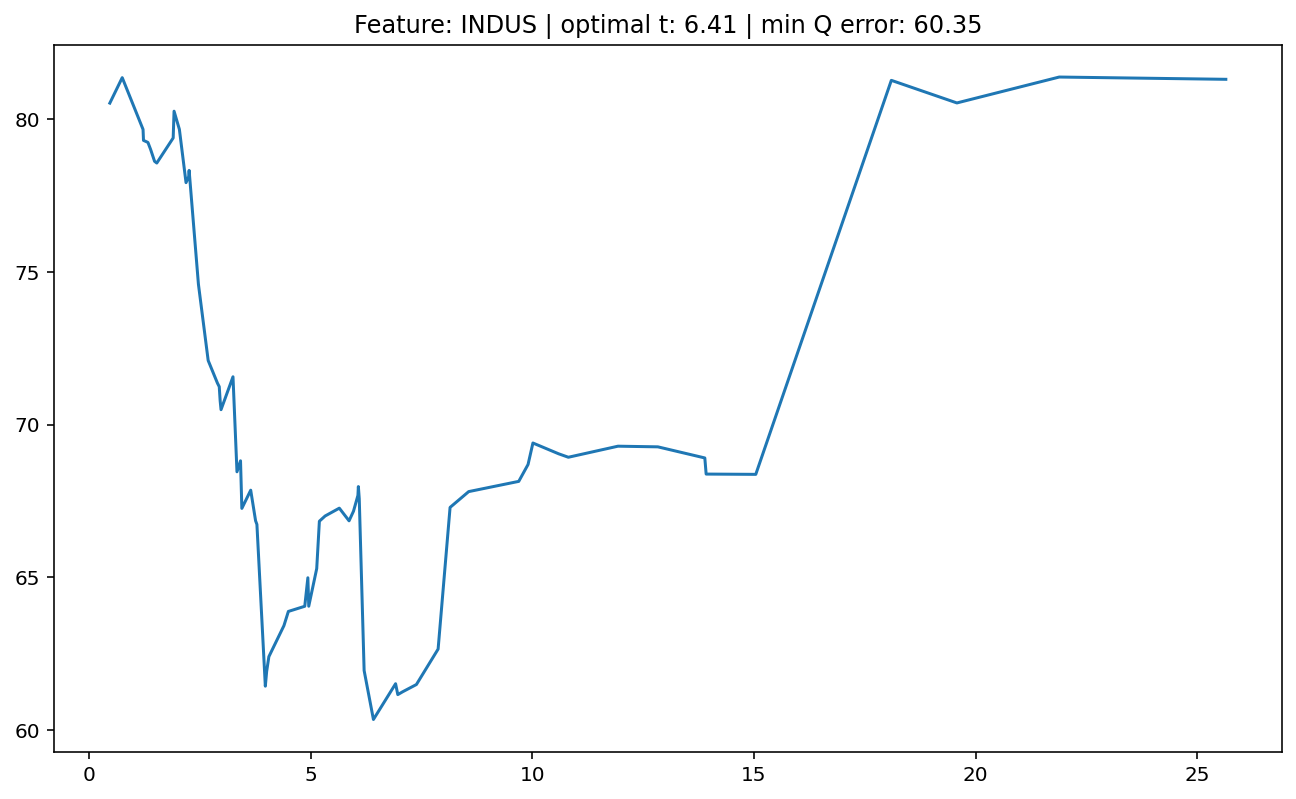

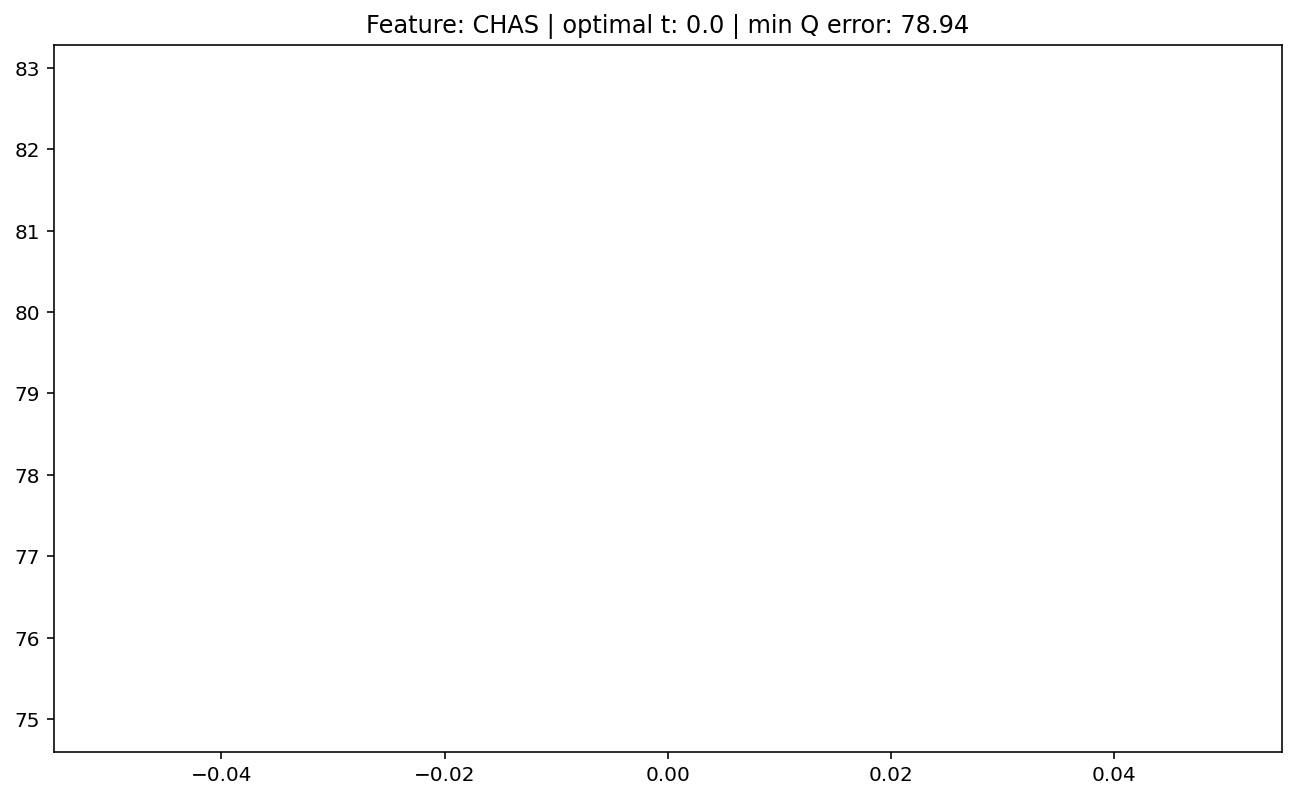

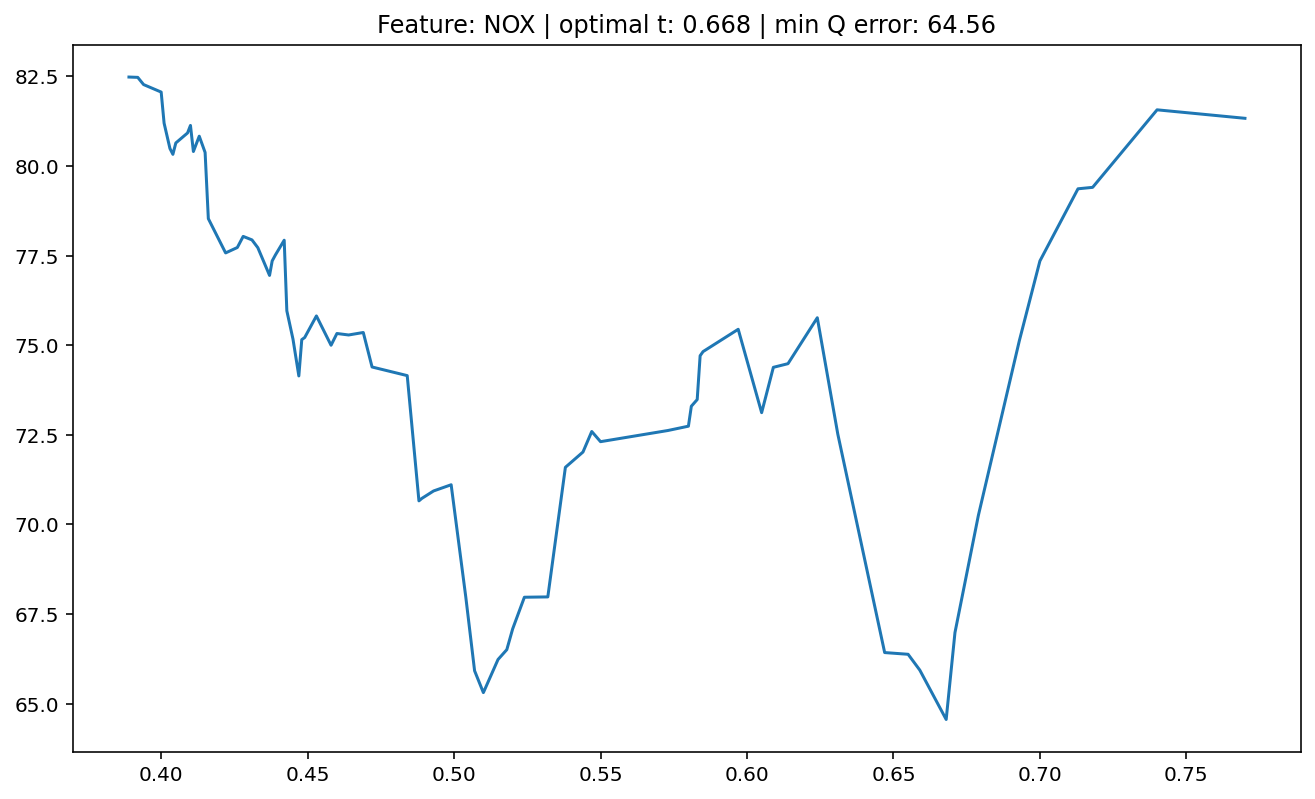

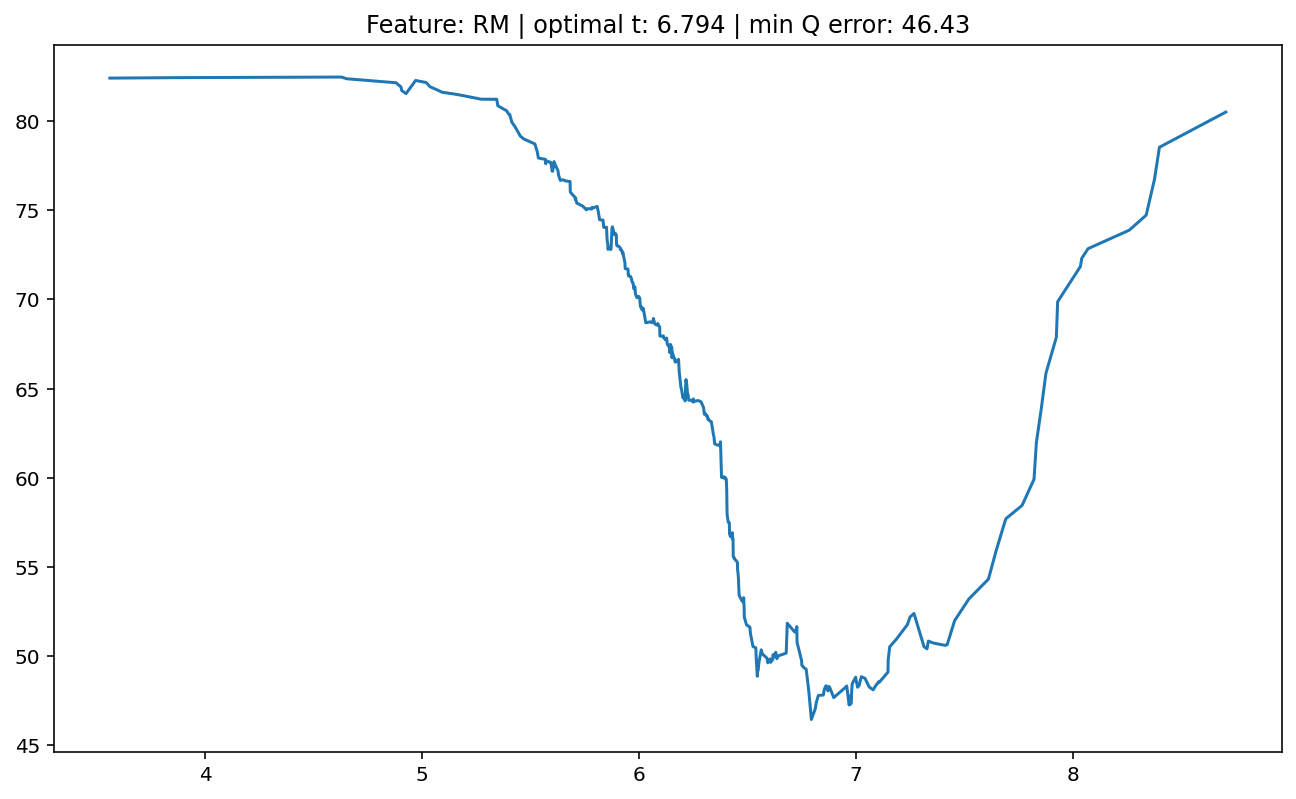

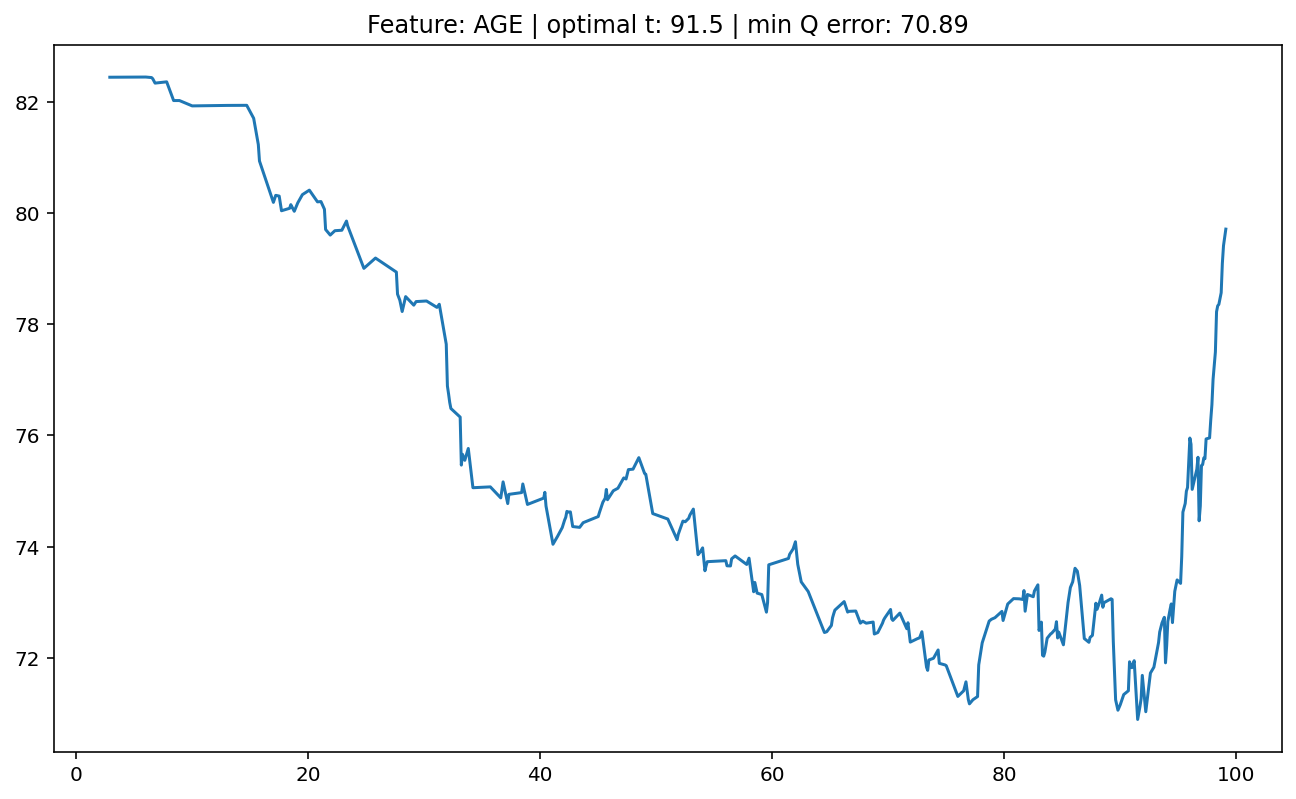

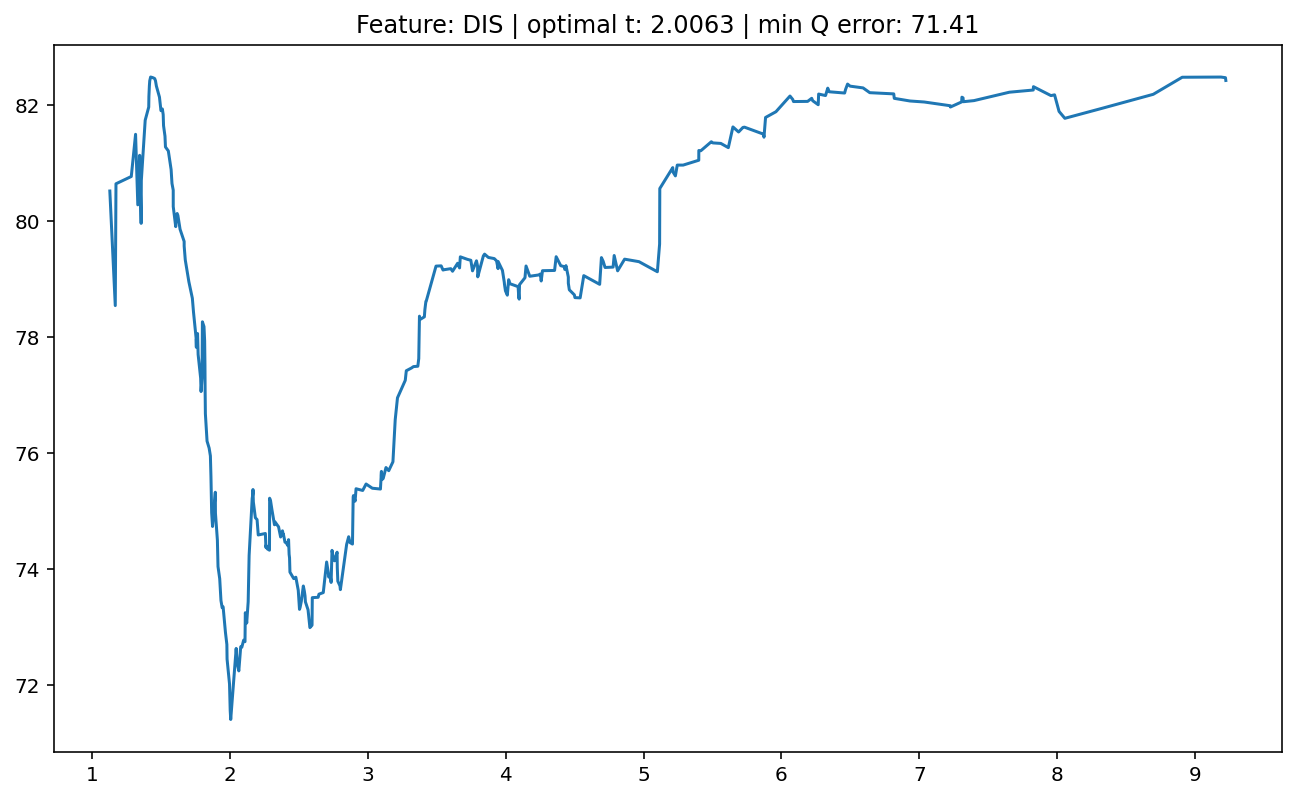

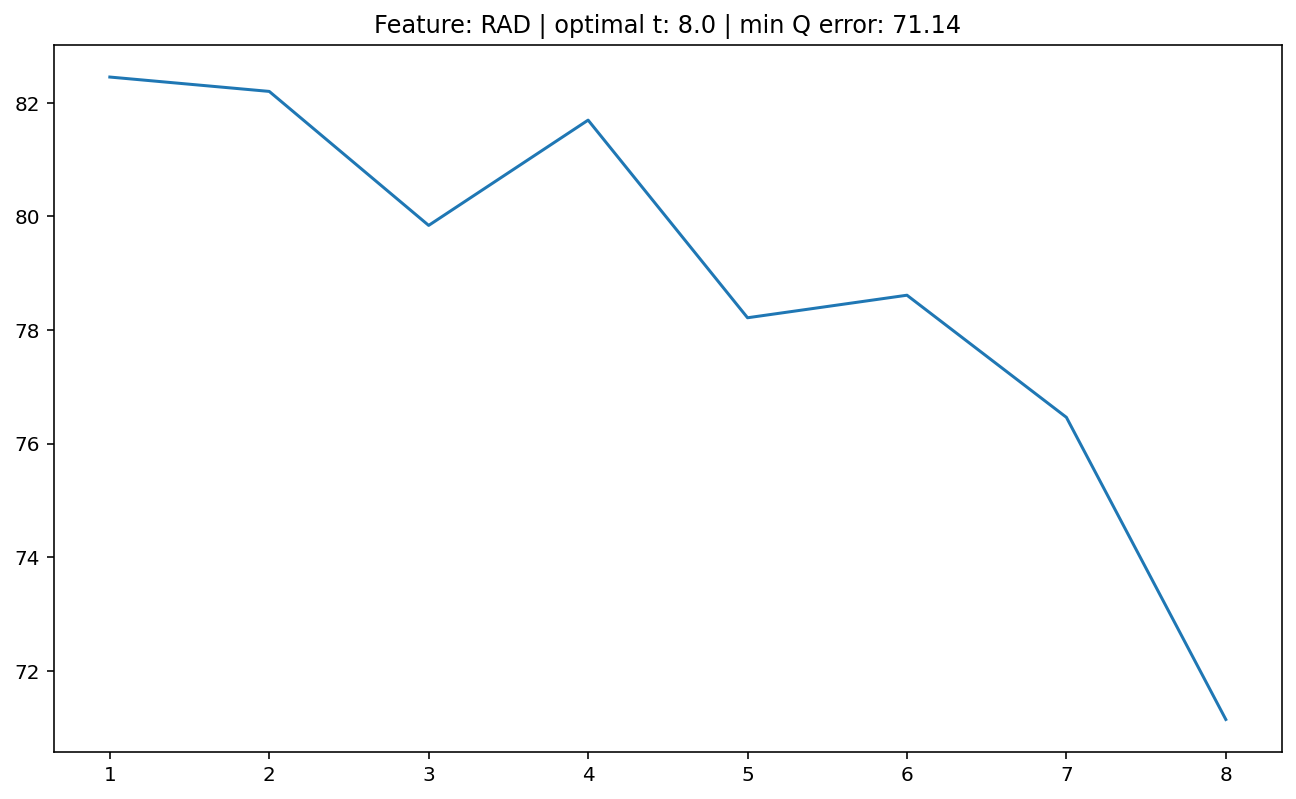

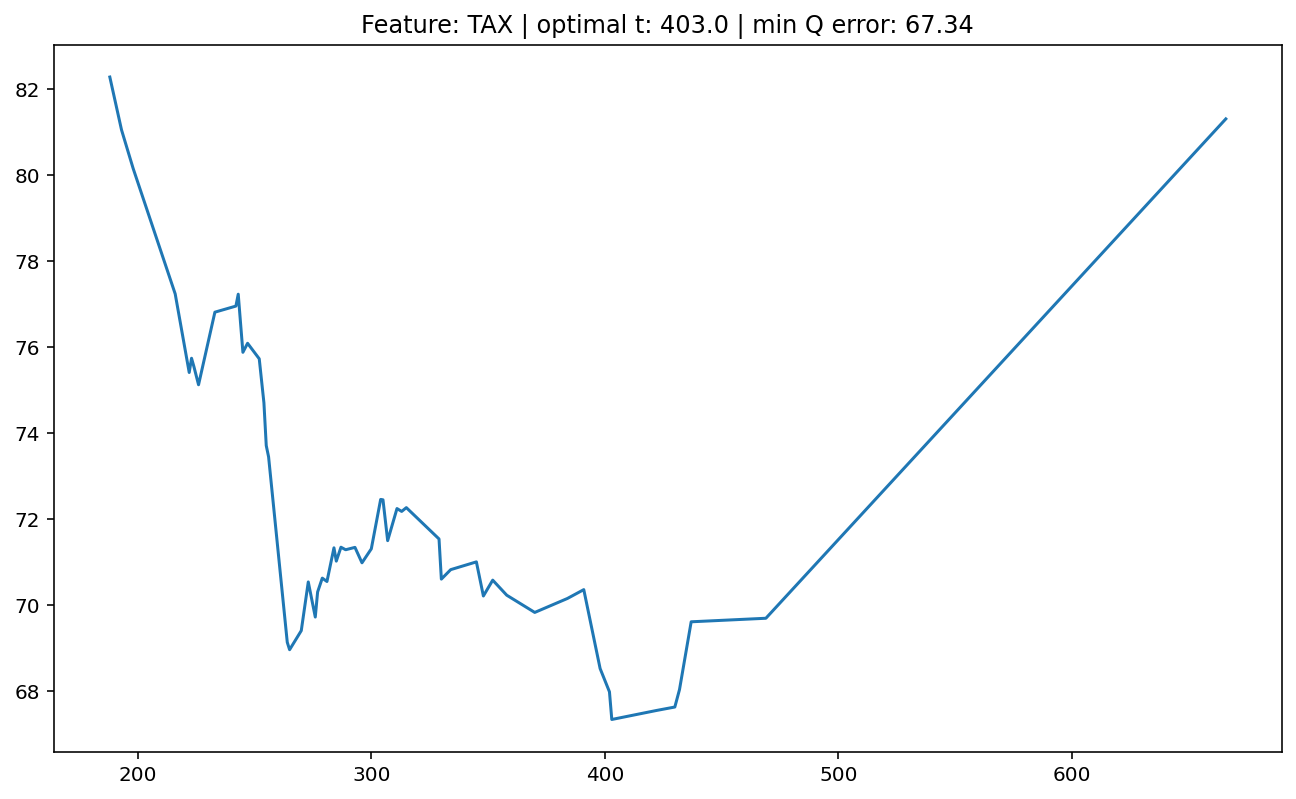

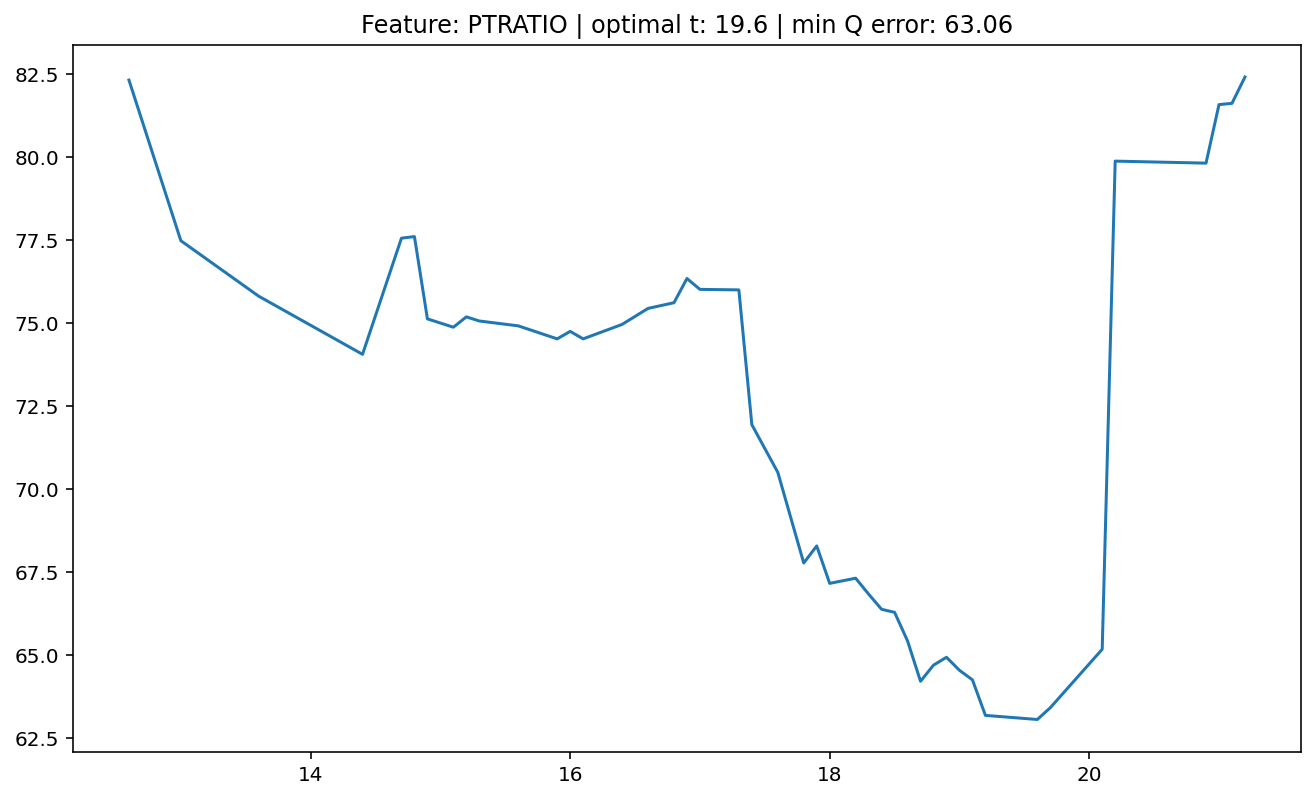

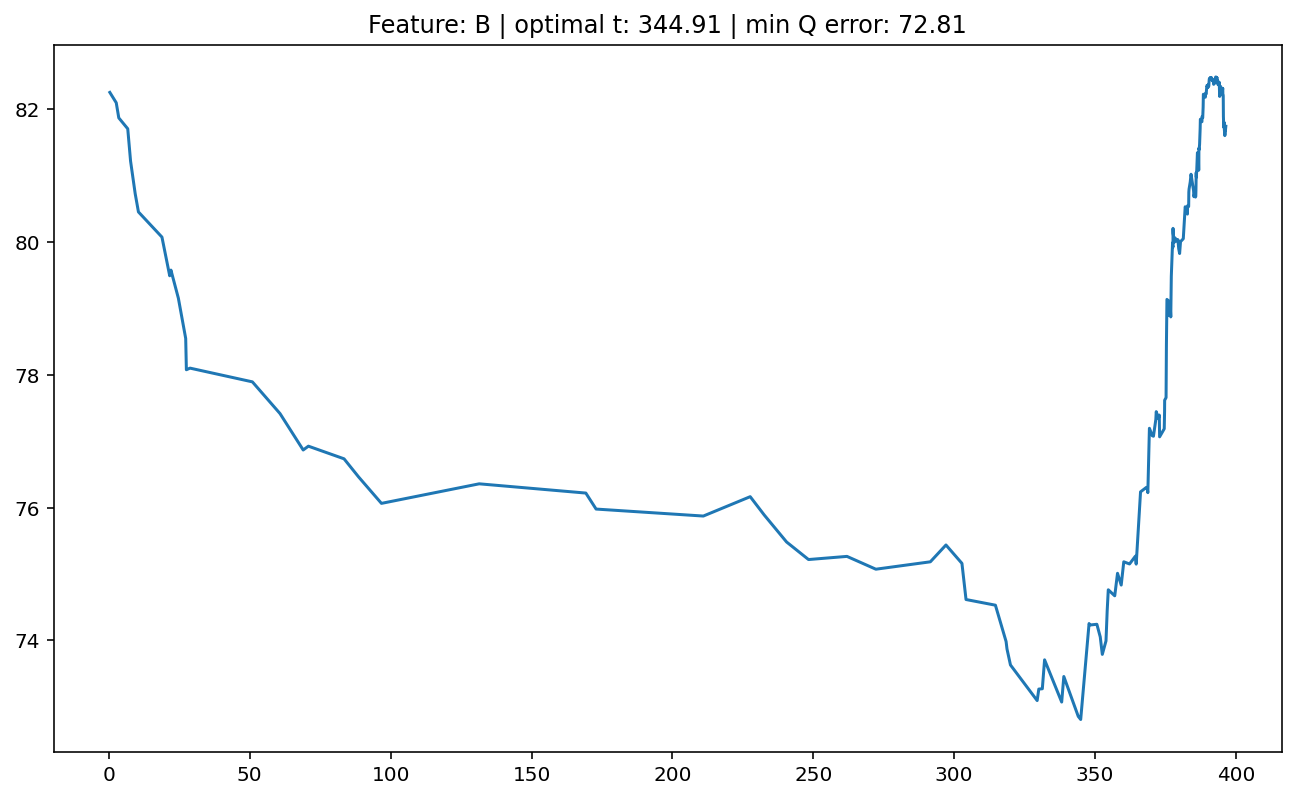

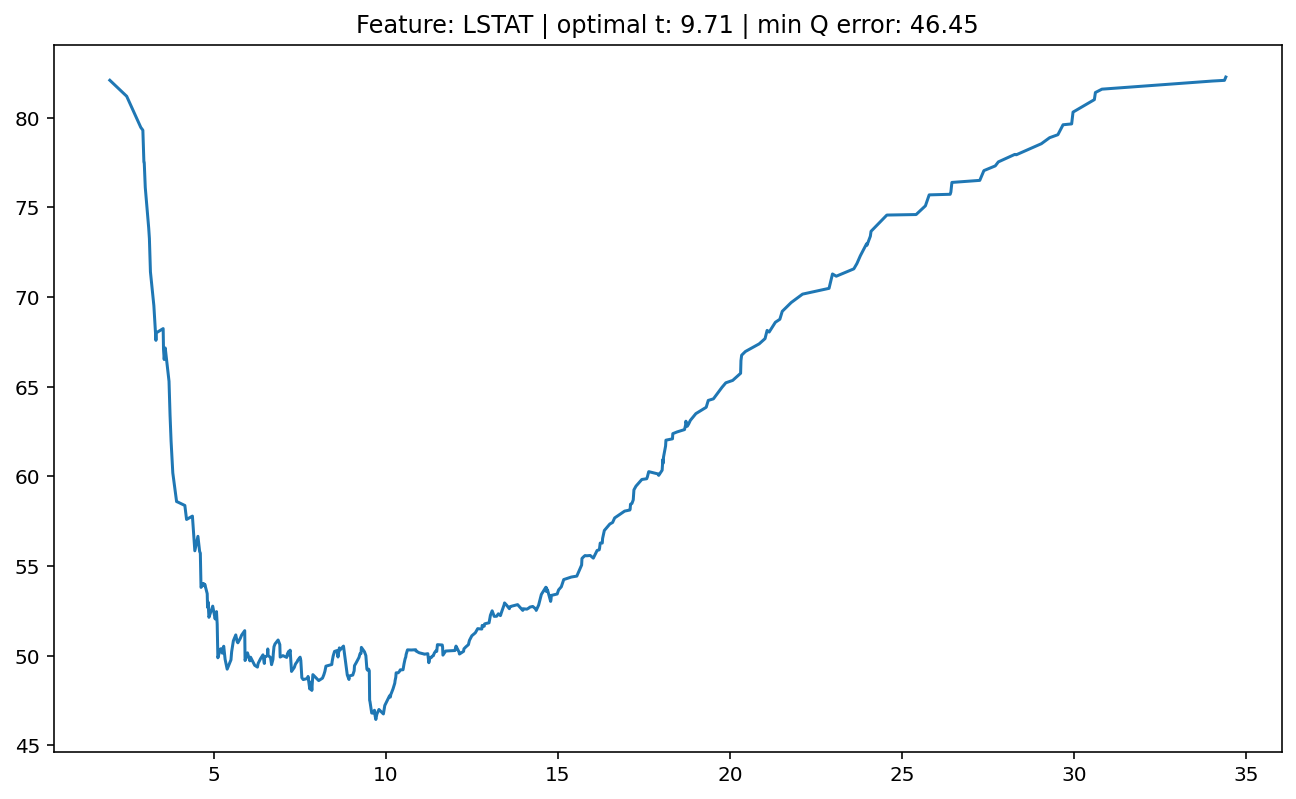

In [42]:
results = []
for f in X_train.columns:
    t, Q_array = get_optimal_split(X_train, f)
    min_error = min(Q_array)
    results.append((f, t, min_error))
    plt.figure()
    plt.title('Feature: {} | optimal t: {} | min Q error: {:.2f}'.format(f, t, min_error))
    plt.plot(np.unique(X_train[f])[:-1], Q_array)
    plt.show()

In [43]:
results = sorted(results, key=lambda x: x[2])
results

[('RM', 6.794, 46.42614228882214),
 ('LSTAT', 9.71, 46.448000769349775),
 ('INDUS', 6.41, 60.347526495859015),
 ('PTRATIO', 19.6, 63.055920087579615),
 ('NOX', 0.668, 64.56169489613504),
 ('TAX', 403.0, 67.3415667505267),
 ('CRIM', 5.82401, 67.39254669771015),
 ('ZN', 12.5, 69.34076590623248),
 ('AGE', 91.5, 70.88908265552672),
 ('RAD', 8.0, 71.1383664054875),
 ('DIS', 2.0063, 71.40506193171146),
 ('B', 344.91, 72.81105281163394),
 ('CHAS', 0.0, 78.93996784223368)]

In [44]:
pd.DataFrame(results, columns=['feature', 'optimal t', 'min Q error'])

,feature,optimal t,min Q error
0,RM,6.79400,46.426142
1,LSTAT,9.71000,46.448001
2,INDUS,6.41000,60.347526
3,PTRATIO,19.60000,63.055920
4,NOX,0.66800,64.561695
5,TAX,403.00000,67.341567
6,CRIM,5.82401,67.392547
7,ZN,12.50000,69.340766
8,AGE,91.50000,70.889083
9,RAD,8.00000,71.138366


In [45]:
optimal_feature, optimal_t, optimal_error = results[0]

_Изобразите разбиение визуально. Для этого постройте диаграмму рассеяния целевой переменной в зависимости от значения найденного признака. Далее изобразите вертикальную линию, соответствующую порогу разбиения. Почему это разбиение может быть лучшим? Как вы можете интерпретировать результат?_

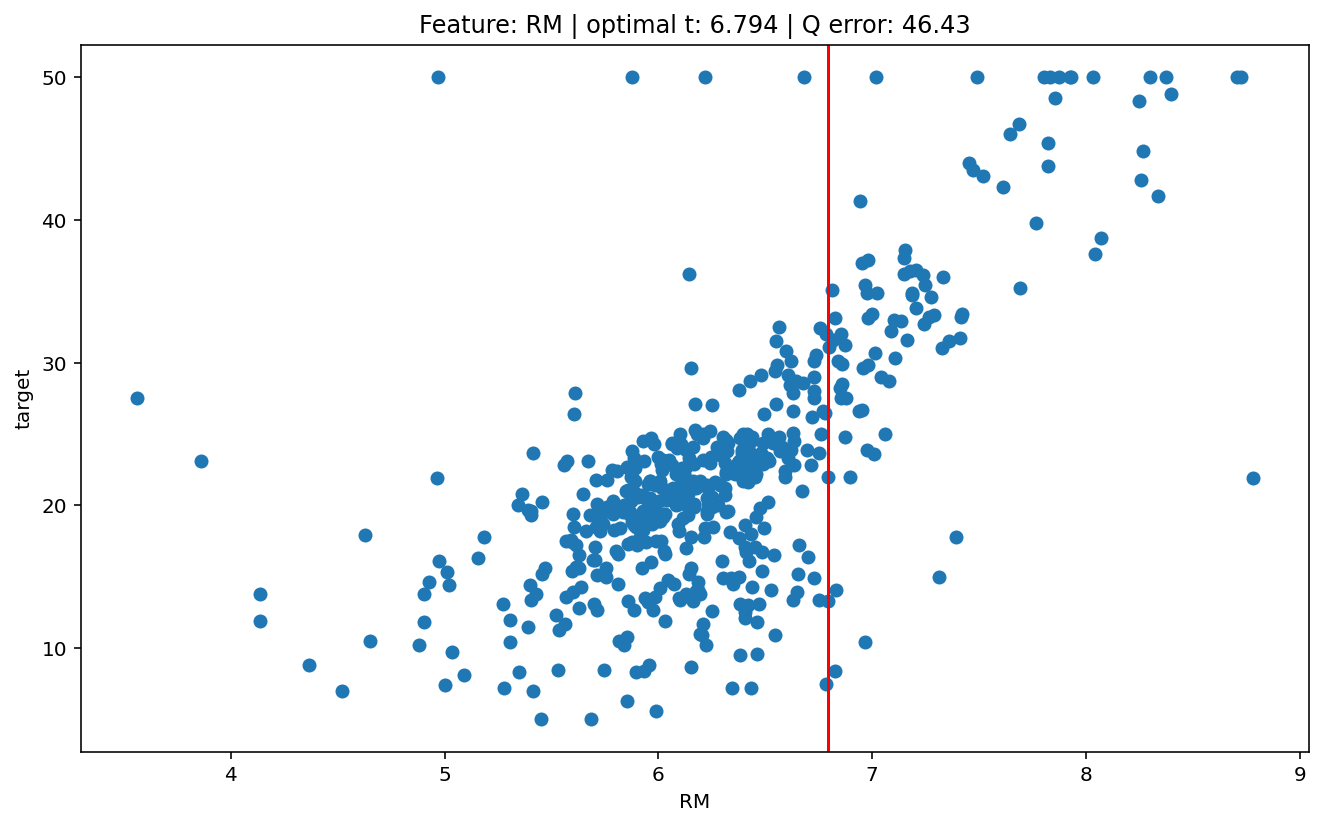

In [47]:
plt.scatter(X[optimal_feature], y)
plt.axvline(x=optimal_t, color="red")
plt.xlabel(optimal_feature)
plt.ylabel('target')
plt.title('Feature: {} | optimal t: {} | Q error: {:.2f}'.format(optimal_feature, optimal_t, optimal_error))
plt.show()

## Решающее дерево: sklearn

In [76]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=3, random_state=13)
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=13, splitter='best')

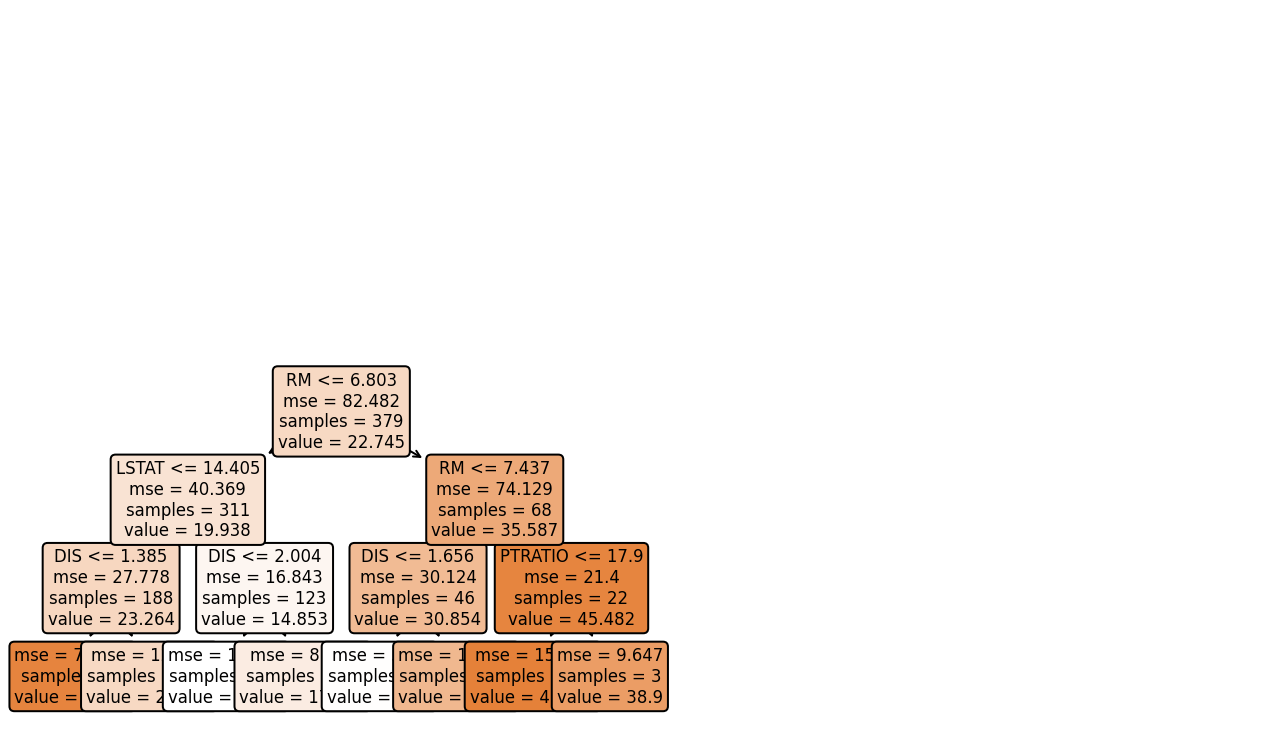

In [77]:
from sklearn.tree import plot_tree
plot_tree(dt, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [78]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, dt.predict(X_test))

37.7071346843913

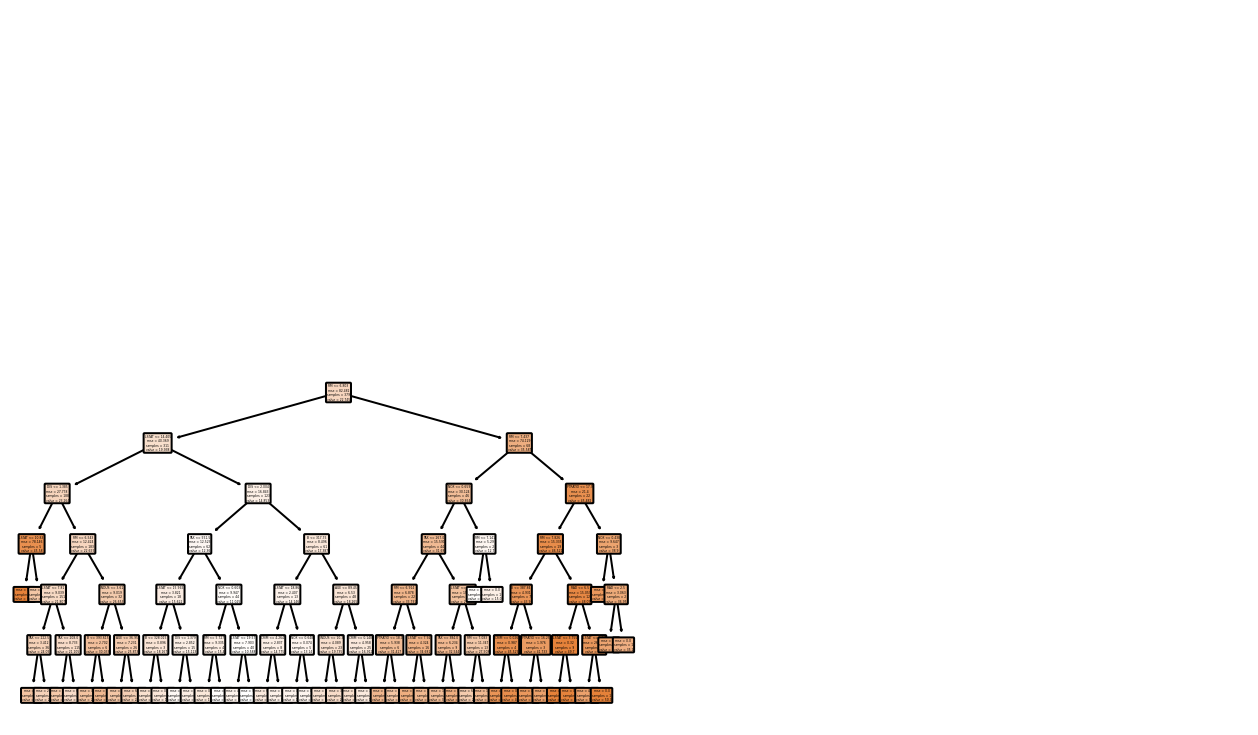

In [79]:
dt = DecisionTreeRegressor(max_depth=6, random_state=13)
dt.fit(X_train, y_train)
plot_tree(dt, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [80]:
mean_squared_error(y_test, dt.predict(X_test))

12.259769039156408

In [81]:
dt.feature_importances_

array([0.0017915 , 0.        , 0.00353474, 0.        , 0.02687167,
       0.59766384, 0.00478304, 0.11292126, 0.0035135 , 0.02381713,
       0.0062183 , 0.00726   , 0.21162502])

In [82]:
pd.DataFrame({
    'feature': X.columns,
    'importance': dt.feature_importances_
}).sort_values(by='importance', ascending=False, ignore_index=True)

,feature,importance
0,RM,0.597664
1,LSTAT,0.211625
2,DIS,0.112921
3,NOX,0.026872
4,TAX,0.023817
5,B,0.007260
6,PTRATIO,0.006218
7,AGE,0.004783
8,INDUS,0.003535
9,RAD,0.003514


Влияет ли стандартизация (масштабирование) признаков на результат работы решающего дерева?

In [83]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
61,0.17171,25.0,5.13,0.0,0.453,5.966,93.4,6.8185,8.0,284.0,19.7,378.08,14.44
97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
207,0.25199,0.0,10.59,0.0,0.489,5.783,72.7,4.3549,4.0,277.0,18.6,389.43,18.06
110,0.10793,0.0,8.56,0.0,0.520,6.195,54.4,2.7778,5.0,384.0,20.9,393.49,13.00


In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
61,-0.382049,0.606785,-0.848363,-0.260011,-0.851779,-0.488599,0.896957,1.486665,-0.159888,-0.690253,0.592093,0.185671,0.285327
97,-0.388162,-0.486443,-1.176083,-0.260011,-0.922106,2.624087,0.271248,-0.164958,-0.859089,-0.737557,-0.214771,0.404139,-1.192625
13,-0.327024,-0.486443,-0.407990,-0.260011,-0.104556,-0.513761,-0.239387,0.437534,-0.626022,-0.554256,1.209107,0.404139,-0.607512
207,-0.372405,-0.486443,-0.049546,-0.260011,-0.535308,-0.759460,0.152580,0.262298,-0.626022,-0.731644,0.070004,0.317425,0.808317
110,-0.389711,-0.486443,-0.346542,-0.260011,-0.262791,-0.149652,-0.505493,-0.521493,-0.509488,-0.098960,1.161645,0.364554,0.077287


In [85]:
# without scaling
for max_depth in [3, 6]:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train, y_train)
    print(mean_squared_error(y_test, dt.predict(X_test)))

37.7071346843913
12.259769039156408


In [86]:
# with scaling
for max_depth in [3, 6]:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train_scaled, y_train)
    print(mean_squared_error(y_test, dt.predict(X_test_scaled)))

37.7071346843913
12.259769039156408
